In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DA_project_marketing/housing_original_extracted_df.csv')
df.head()

State         City             Street  Zipcode   Latitude  Longitude  \
0    AL     Saraland           Scott Dr  36571.0  30.819534 -88.095960   
1    AL    Southside       Big Oak Dr W  35907.0  33.881050 -86.012436   
2    AL  Robertsdale    Cowpen Creek Rd  36567.0  30.590004 -87.580376   
3    AL  Gulf Shores  Spinnaker Dr #201  36542.0  30.284956 -87.747920   
4    AL      Chelsea         Mallet Way  35043.0  33.357986 -86.608700   

   Bedroom  Bathroom    Area        PPSq  LotArea  ConvertedLot LotUnit  \
0      4.0       2.0  1614.0  148.636927  0.38050       0.38050   acres   
1      3.0       2.0  1474.0    0.000678  0.67034       0.67034   acres   
2      3.0       2.0  1800.0  144.388889  3.20000       3.20000   acres   
3      2.0       2.0  1250.0  274.000000      NaN           NaN     NaN   
4      3.0       3.0  2224.0  150.629496  0.26000       0.26000   acres   

   MarketEstimate  RentEstimate     Price  
0        240600.0        1599.0  239900.0  
1        186700.0        1381.0       1.0  
2             NaN           NaN  259900.0  
3             NaN           NaN  342500.0  
4        336200.0        1932.0  335000.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           24135 non-null  object 
 1   City            24135 non-null  object 
 2   Street          24104 non-null  object 
 3   Zipcode         24135 non-null  float64
 4   Latitude        24135 non-null  float64
 5   Longitude       24135 non-null  float64
 6   Bedroom         23456 non-null  float64
 7   Bathroom        23524 non-null  float64
 8   Area            23029 non-null  float64
 9   PPSq            22784 non-null  float64
 10  LotArea         23103 non-null  float64
 11  ConvertedLot    23103 non-null  float64
 12  LotUnit         23103 non-null  object 
 13  MarketEstimate  15927 non-null  float64
 14  RentEstimate    17649 non-null  float64
 15  Price           24130 non-null  float64
dtypes: float64(12), object(4)
memory usage: 3.0+ MB


<h3>Mô tả đặc trưng:</h3>

* State: Tiểu bang mà bất động sản đặt trong (AL: Alabama). Bao gồm tất cả các tiểu bang của Hoa Kỳ ngoại trừ Hawaii.
* City: Thành phố nơi bất động sản được đặt.
* Street: Địa chỉ đường của bất động sản.
* Zipcode: Mã bưu chính liên kết với bất động sản.
* Bedroom: Số phòng ngủ trong ngôi nhà.
* Bathroom: Số phòng tắm trong ngôi nhà.
* Area(sqft): Tổng diện tích của ngôi nhà (feet vuông).
* PPSq(Price Per Square Foot): Chi phí mỗi feet vuông của bất động sản.
* LotArea(acres): Diện tích đất tổng của bất động sản (acres).
* ConvertedLot: Tổng diện tích chuyển đổi từ việc sử dụng đất sang loại hình sử dụng khác.
* LotUnit: Đơn vị đo của lô đất đó. Bao gồm 2 đơn vị đo là acres và sqft.

* MarketEstimate(Dollars $): Giá trị thị trường ước tính của bất động sản.

* Latitude: Tọa độ vĩ độ của bất động sản.
* Longitude: Tọa độ kinh độ của bất động sản.

* RentEstimate(Dollars $):Giá trị cho thuê ước tính của bất động sản

* Price:(Dollars $): Giá niêm yết của bất động sản.

<h3>Tổng quan sát:</h3>

* Tập dữ liệu có 16 đặc trưng, 22681 dòng dữ liệu.
* Có 12 đặc trưng dạng numerical: Zipcode, Latitude, Longitude, Bedroom, Bathroom, Area, PPSq, LotArea, ConvertedLot, MarketEstimate, RentEstimate, Price
* Có 4 đặc trưng dạng categorical: State, City, Street, LotUnit
* Các đặc trưng có missing value: State, City, Street, Zipcode, Latitude, Longitude,Bedroom, Bathroom, Area, PPSq, LotArea, ConvertedLot,LotUnit, MarketEstimate, RentEstimate, Price


In [ ]:
df[['LotArea','ConvertedLot','LotUnit']].head(15)

LotArea  ConvertedLot LotUnit
0      0.380500      0.380500   acres
1      0.670340      0.670340   acres
2      3.200000      3.200000   acres
3           NaN           NaN     NaN
4      0.260000      0.260000   acres
5           NaN           NaN     NaN
6   8712.000000      0.200000    sqft
7      0.380000      0.380000   acres
8      0.344353      0.344353   acres
9           NaN           NaN     NaN
10     0.344300      0.344300   acres
11     0.340000      0.340000   acres
12          NaN           NaN     NaN
13  8585.676000      0.197100    sqft
14     0.340000      0.340000   acres

In [ ]:
df['ConvertedLot'] = df['ConvertedLot'].apply(lambda x : x * 43560)
df[['LotArea','ConvertedLot','LotUnit']].head(20)

LotArea  ConvertedLot LotUnit
0      0.380500     16574.580   acres
1      0.670340     29200.000   acres
2      3.200000    139392.000   acres
3           NaN           NaN     NaN
4      0.260000     11325.600   acres
5           NaN           NaN     NaN
6   8712.000000      8712.000    sqft
7      0.380000     16552.800   acres
8      0.344353     15000.000   acres
9           NaN           NaN     NaN
10     0.344300     14997.708   acres
11     0.340000     14810.400   acres
12          NaN           NaN     NaN
13  8585.676000      8585.676    sqft
14     0.340000     14810.400   acres
15     0.530000     23086.800   acres
16     0.258300     11251.548   acres
17     0.610000     26571.600   acres
18     1.000000     43560.000   acres
19     1.177200     51278.832   acres

In [ ]:
df.drop(['LotArea','LotUnit'],axis=1,inplace=True)

***

# **Data Cleaning**

In [ ]:
df.rename(index = str, columns = {'State' : 'state',
                                  'City' : 'city',
                                  'Street' : 'street',
                                  'Zipcode' : 'zipcode',
                                  'Bedroom' : 'bedroom',
                                  'Bathroom' : 'bathroom',
                                  'Area' : 'area',
                                  'PPSq' : 'ppsq',
                                  'ConvertedLot' : 'lot_area',
                                  'MarketEstimate' : 'market_es',
                                  'RentEstimate' : 'rent_es',
                                  'Latitude':'latitude',
                                  'Longitude':'longitude',
                                  'Price' : 'price'}, inplace = True)

df.head()

state         city             street  zipcode   latitude  longitude  \
0    AL     Saraland           Scott Dr  36571.0  30.819534 -88.095960   
1    AL    Southside       Big Oak Dr W  35907.0  33.881050 -86.012436   
2    AL  Robertsdale    Cowpen Creek Rd  36567.0  30.590004 -87.580376   
3    AL  Gulf Shores  Spinnaker Dr #201  36542.0  30.284956 -87.747920   
4    AL      Chelsea         Mallet Way  35043.0  33.357986 -86.608700   

   bedroom  bathroom    area        ppsq   lot_area  market_es  rent_es  \
0      4.0       2.0  1614.0  148.636927   16574.58   240600.0   1599.0   
1      3.0       2.0  1474.0    0.000678   29200.00   186700.0   1381.0   
2      3.0       2.0  1800.0  144.388889  139392.00        NaN      NaN   
3      2.0       2.0  1250.0  274.000000        NaN        NaN      NaN   
4      3.0       3.0  2224.0  150.629496   11325.60   336200.0   1932.0   

      price  
0  239900.0  
1       1.0  
2  259900.0  
3  342500.0  
4  335000.0

In [ ]:
df.nunique()

state           49
city          5804
street       20464
zipcode       9806
latitude     24050
longitude    24036
bedroom         22
bathroom        36
area          4094
ppsq         20674
lot_area      5872
market_es     6945
rent_es       3423
price         2895
dtype: int64

Tỉ lệ dữ liệu bị khuyết so với tổng số dữ liệu trong cột: 


Total  Percent
market_es   8594    35.05
rent_es     6872    28.02
ppsq        1737     7.08
area        1492     6.08
lot_area    1418     5.78
bedroom     1065     4.34
bathroom     997     4.07
street       417     1.70
price        391     1.59
state        386     1.57
city         386     1.57
zipcode      386     1.57
latitude     386     1.57
longitude    386     1.57

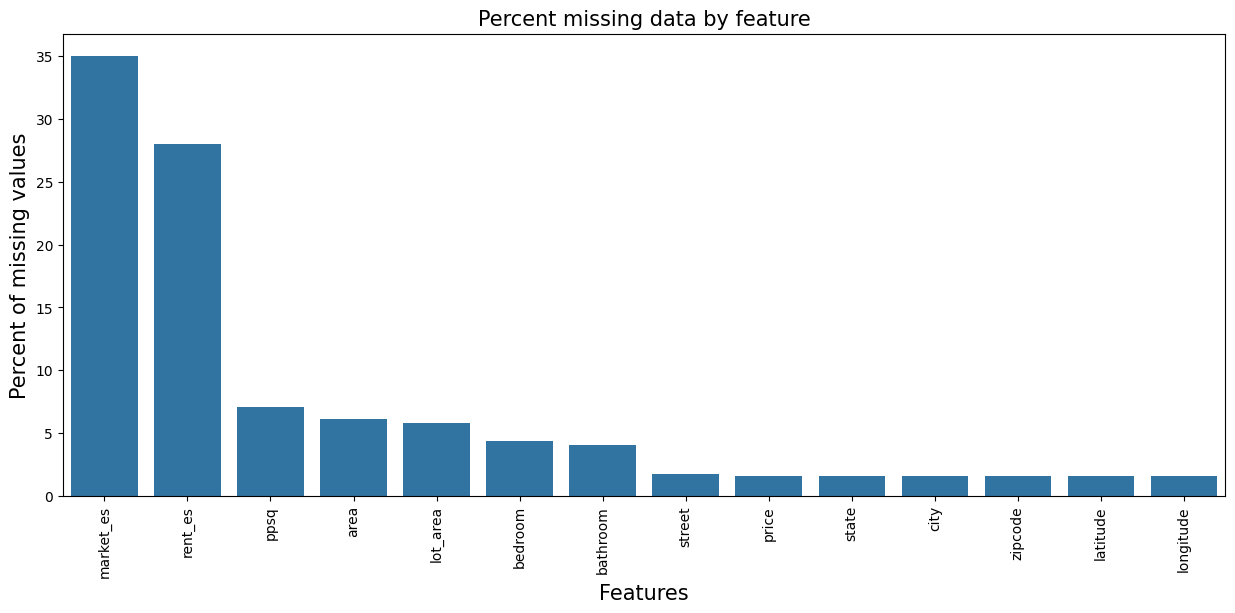

In [ ]:
print("Tỉ lệ dữ liệu bị khuyết so với tổng số dữ liệu trong cột: ")
total = df.isnull().sum().sort_values(ascending=False)
percent_missing =round(df.isnull().sum()/(len(df))*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent_missing], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='vertical')
sns.barplot(x= missing_data.index , y= missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

In [ ]:
df.dropna(subset=['ppsq','area','lot_area','street','price','state','city','zipcode','latitude','longitude'],inplace=True)

Tỉ lệ dữ liệu bị khuyết so với tổng số dữ liệu trong cột: 


Total  Percent
market_es   6915    31.60
rent_es     5717    26.13
bathroom      38     0.17
bedroom       12     0.05
state          0     0.00
city           0     0.00
street         0     0.00
zipcode        0     0.00
latitude       0     0.00
longitude      0     0.00
area           0     0.00
ppsq           0     0.00
lot_area       0     0.00
price          0     0.00

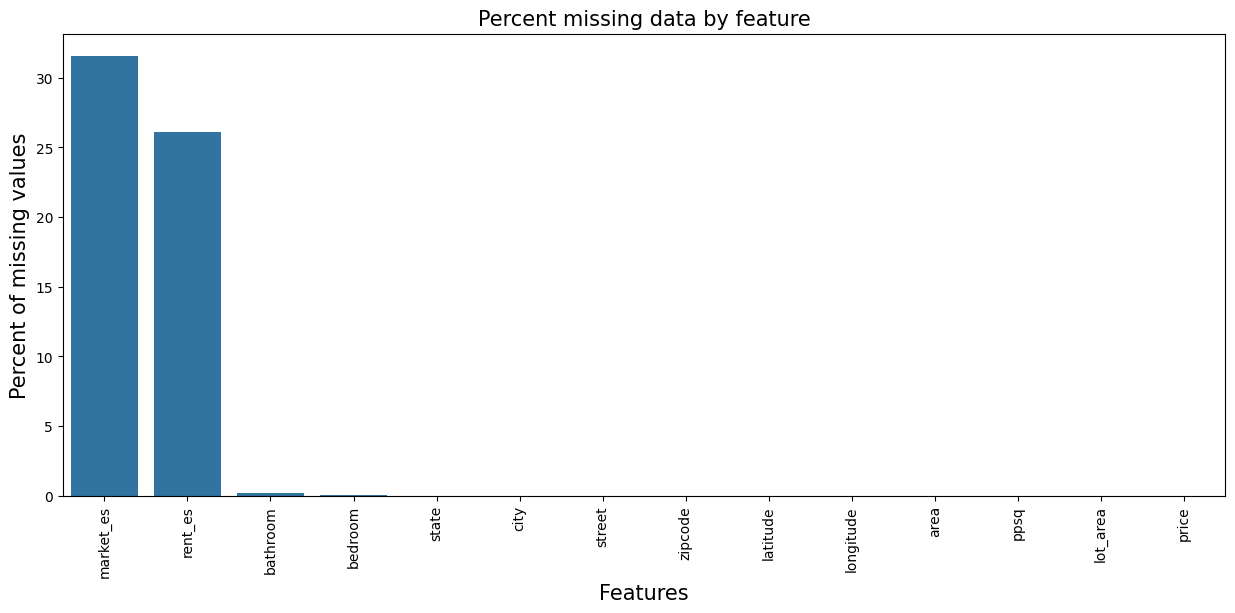

In [ ]:
print("Tỉ lệ dữ liệu bị khuyết so với tổng số dữ liệu trong cột: ")
total = df.isnull().sum().sort_values(ascending=False)
percent_missing =round(df.isnull().sum()/(len(df))*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent_missing], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='vertical')
sns.barplot(x= missing_data.index , y= missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

In [ ]:
df.shape

(21882, 14)

In [ ]:
df.bathroom = df.bathroom.fillna(df.bathroom.median())
df.bedroom = df.bedroom.fillna(df.bathroom.median())

In [ ]:

df['rent_es'] = df.groupby(['state'], group_keys=False)['rent_es'].apply(lambda x: x.fillna(x.median()))
df['market_es'] = df.groupby(['state'], group_keys=False)['market_es'].apply(lambda x: x.fillna(x.median()))


In [ ]:
print("Tỉ lệ dữ liệu bị khuyết so với tổng số dữ liệu trong cột: ")
total = df.isnull().sum().sort_values(ascending=False)
percent_missing =round(df.isnull().sum()/(len(df))*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data

Tỉ lệ dữ liệu bị khuyết so với tổng số dữ liệu trong cột: 


Total  Percent
state          0      0.0
city           0      0.0
street         0      0.0
zipcode        0      0.0
latitude       0      0.0
longitude      0      0.0
bedroom        0      0.0
bathroom       0      0.0
area           0      0.0
ppsq           0      0.0
lot_area       0      0.0
market_es      0      0.0
rent_es        0      0.0
price          0      0.0

In [ ]:
df.describe().T

count           mean           std           min            25%  \
zipcode    21882.0   50377.315465  2.948015e+04   1002.000000   26003.000000   
latitude   21882.0      39.777783  5.737127e+00     25.449816      35.930411   
longitude  21882.0     -92.516732  1.690621e+01   -161.772780    -103.627470   
bedroom    21882.0       3.416598  1.105559e+00      0.000000       3.000000   
bathroom   21882.0       2.434030  1.188217e+00      0.000000       2.000000   
area       21882.0    2155.404214  1.619824e+03      1.000000    1416.500000   
ppsq       21882.0     267.565806  4.174375e+03      0.000000     132.925306   
lot_area   21882.0  409591.327989  2.645433e+07      0.000000    7590.250000   
market_es  21882.0  444002.759894  9.729581e+05  15700.000000  235900.000000   
rent_es    21882.0    2512.134768  3.537606e+03    100.000000    1689.000000   
price      21882.0  550027.572982  1.742165e+06      0.000000  229550.000000   

                     50%            75%           max  
zipcode     52330.000000   74955.000000  9.995000e+04  
latitude       39.928411      42.966315  6.504437e+01  
longitude     -89.535830     -79.837362 -6.701603e+01  
bedroom         3.000000       4.000000  3.600000e+01  
bathroom        2.000000       3.000000  3.000000e+01  
area         1869.000000    2493.000000  9.999000e+04  
ppsq          184.334634     257.191439  5.500000e+05  
lot_area    13068.000000   41382.000000  3.812241e+09  
market_es  329450.000000  453800.000000  7.195920e+07  
rent_es      2100.000000    2700.000000  2.128340e+05  
price      349000.000000  504999.750000  7.600000e+07

In [ ]:
df[df['area'] <= 300].sort_values(by='area', ascending=False)

state            city                      street  zipcode   latitude  \
8632     ME        Danforth                Boulder Road   4424.0  45.677174   
22694    WA         Seattle    Westlake Avenue N UNIT 8  98109.0  47.637380   
1590     AR          Leslie                  Dogbane Dr  72645.0  35.815990   
12351    MT         Cascade                 Gunsight Ln  59421.0  47.156937   
21593    VT        Stamford                   County Rd   5352.0  42.776040   
9946     MA    South Dennis  Old Chatham Road UNIT A-67   2660.0  41.711100   
24363    WY          Lander                    Aspen Dr  82520.0  42.500416   
12444    MT          Clancy             Travis Creek Rd  59634.0  46.487583   
8696     ME      Robbinston                 Travis Lane   4671.0  45.073820   
8862     ME            York     Long Sands Road UNIT 17   3909.0  43.151855   
10275    MI       Covington                       Fo Rd  49919.0  46.502810   
22789    WA        Concrete            White Falls Lane  98237.0  48.443570   
8847     ME            Peru               Dickvale Road   4290.0  44.511692   
22714    WA         Seattle  Westlake Avenue N UNIT 118  98109.0  47.643333   
841      AK        Sterling             Backcountry Ave  99672.0  60.561287   
8827     ME          Eustis          TBD Tim Brook Road   4936.0  45.220116   
21066    UT  Salt Lake City          E Panorama Rd #350  84109.0  40.724900   
12367    MT     Three Forks                    Track Rd  59752.0  46.047474   
12863    NE      Gothenburg                    Avenue F  69138.0  40.930614   
100      AL      Eight Mile                 Rosemary Rd  36613.0  30.814259   
12033    MT  Jefferson City               Beavertown Rd  59638.0  46.343475   
14651    NM         Abiquiu             County Road 156  87510.0  36.238560   
20106    TN     Sevierville                Blue Mist Rd  37876.0  35.767197   

        longitude  bedroom  bathroom   area           ppsq     lot_area  \
8632   -67.813560      2.0       0.0  300.0     563.333333    38768.400   
22694 -122.339386      1.0       1.0  300.0     898.333333      561.924   
1590   -92.605180      1.0       0.0  292.0     171.232877   435600.000   
12351 -111.933365      1.0       1.0  286.0     349.650350   435600.000   
21593  -73.107920      1.0       0.0  280.0     889.285714  1167408.000   
9946   -70.144035      2.0       1.0  270.0     177.777778        0.000   
24363 -108.730610      1.0       1.0  264.0     587.121212     3920.400   
12444 -112.090180      1.0       2.0  256.0    1074.218750   476110.800   
8696   -67.167410      1.0       1.0  256.0     312.109375   135036.000   
8862   -70.625690      1.0       1.0  240.0    1204.166667    43560.000   
10275  -88.595924      1.0       0.0  240.0     258.333333   871200.000   
22789 -121.581520      1.0       1.0  240.0     354.166667    24053.832   
8847   -70.471115      1.0       0.0  228.0     811.403509   849420.000   
22714 -122.344025      1.0       1.0  200.0     397.500000      561.924   
841   -150.624220      0.0       0.0  192.0     677.083333   105415.200   
8827   -70.491100      1.0       0.0  192.0     671.875000   111078.000   
21066 -111.710920      2.0       2.0  160.0    2500.000000    49658.400   
12367 -111.337760      1.0       0.0  120.0    1135.000000   505296.000   
12863 -100.158270      4.0       2.0  100.0    1890.000000     7700.000   
100    -88.247690      2.0       2.0   16.0    5000.000000    26122.932   
12033 -112.079490      1.0       2.0    1.0  194900.000000   761167.440   
14651 -106.282060      2.0       2.0    1.0  550000.000000   448232.400   
20106  -83.478580      2.0       2.0    1.0  200000.000000    23522.400   

       market_es  rent_es     price  
8632    320750.0    793.0  169000.0  
22694   406700.0   2327.0  269500.0  
1590    239700.0    999.0   50000.0  
12351    90500.0    900.0  100000.0  
21593   254300.0   1099.0  249000.0  
9946    569050.0   3214.0   48000.0  
24363   148700.0    825.0  155000.0  
1244

In [ ]:
df =df[df['area'] > 16]

In [ ]:
df[df['price'] < 2000].sort_values(by='price', ascending=False)

state            city               street  zipcode   latitude  \
5809     IL      Carbondale     Silver Bullet Dr  62903.0  37.707348   
18426    PA    Philadelphia               Kip St  19134.0  40.000637   
11608    MO       Van Buren       Carter Route M  63965.0  37.023200   
94       AL         Altoona             Sloan Dr  35952.0  34.039066   
10555    MN           Stacy             Ivan Ave  55079.0  45.448050   
10564    MN       Annandale  State Highway 24 NW  55302.0  45.275960   
10627    MN           Osage     State Highway 34  56570.0  46.910305   
10767    MN         Gonvick             460th St  56644.0  47.675440   
10783    MN      Hackensack         Poquet Dr NW  56452.0  46.922928   
1        AL       Southside         Big Oak Dr W  35907.0  33.881050   
7810     KY   Elizabethtown           Foxfire Rd  42701.0  37.726776   
11863    MO     Kansas City           NE 53rd St  64118.0  39.190670   
15268    NY            Elma           Clinton St  14059.0  42.858050   
15568    NC        Oriental             Mills Rd  28571.0  35.087860   
16594    OH       Mansfield       Opossum Run Rd  44903.0  40.670660   
16783    OH     Westerville            Schott Rd  43081.0  40.123215   
18932    RI       Pawtucket           S Union St   2860.0  41.874825   
8008     KY         Liberty        River View Dr  42539.0  37.317310   
8252     LA       Lafayette       Rocky Mound Dr  70506.0  30.205654   
1826     AR       Van Buren           Chelsie Ln  72956.0  35.483566   
1824     AR            Alma         Highway 64 E  72921.0  35.495136   
1870     AR      Fort Smith             N 5th St  72901.0  35.391644   
110      AL         Gadsden        Ridgecrest Rd  35901.0  33.952800   
7048     KS   Overland Park            Lamar Ave  66207.0  38.954270   
6524     IA  Council Bluffs          Oakland Ave  51503.0  41.267387   
1660     AR        Mulberry       Old Graphic St  72947.0  35.523760   
6064     IN     Bloomington         S Darrell Dr  47403.0  39.121643   
6040     IN    Indianapolis          W Epler Ave  46217.0  39.685880   
17790    OR         Astoria              Maki Rd  97103.0  46.159400   
181      AL         Harvest       Ford Chapel Rd  35749.0  34.841938   
17662    OR        Portland         NE Bryant St  97211.0  45.573204   
166      AL          Athens            Norton Dr  35613.0  34.793026   
19523    SD         Sturgis      Washington Loop  57785.0  44.404514   
20156    TN     Chattanooga            Sioux Trl  37411.0  35.022285   
20254    TN       Jamestown   Stockton Chapel Rd  38556.0  36.409924   
20320    TN          Sparta         Duck Pond Rd  38583.0  35.984950   
16763    OH    Port Clinton            E Sand Rd  43452.0  41.535385   
7247     KS         Wichita       E Eastwood Ave  67218.0  37.676727   
16525    OH          Toledo          Broadway St  43609.0  41.621323   
16152    ND       Bottineau            Shores Rd  58318.0  48.990580   
7360     KS         Wichita          E 13th St N  67206.0  37.710537   
12864    NE         Wauneta           S Arapahoe  69045.0  40.415154   
5863     IL      Naperville      W Van Buren Ave  60540.0  41.773815   
6109     IN      Georgetown      Buttontown Road  47122.0  38.349743   
7056     KS        Winfield         Alexander St  67156.0  37.241240   
7193     KS         Augusta          E Arnold Dr  67010.0  37.715084   
7212     KS         Andover           N Lioba Dr  67002.0  37.688015   
7778     KY      Greenville     Leighs Chapel Rd  42345.0  37.141895   
7761     KY   Bowling Green            Loving Rd  42101.0  37.026566   
23263    WV         Waverly      Laurel Creek Rd  26184.0  39.278206   

        longitude  bedroom  bathroom     area      ppsq      lot_area  \
5809   -89.279230      2.0       5.0   2900.0  0.344828  1.785960e+06   
18426  -75.125760      3.0       1.0   1060.0  0.471698  8.620000e+02   
11608  -91.068400      3.0       2.0   2172.0  0.000460  2.178000e+05   
94     -86.319916      4.0       1.0   20

In [ ]:
df = df[df['rent_es'] < df['price']]

In [ ]:
df[df['price'] < 100000].sort_values(by='price', ascending=False)

state          city           street  zipcode   latitude   longitude  \
21883    VT       Swanton     Olive Street   5488.0  44.920467  -73.131920   
7332     KS     Frontenac  W Washington St  66763.0  37.450190  -94.692490   
935      AK      Skwentna       Shell Ln N  99667.0  61.983593 -151.591220   
1972     AR   Calico Rock          Main St  72519.0  36.117670  -92.142890   
22075    VA       Bumpass   Belle Meade Rd  23024.0  37.939740  -77.740970   
...     ...           ...              ...      ...        ...         ...   
18167    PA  Turtle Creek       Negley Ave  15145.0  40.412724  -79.827255   
16756    OH        Toledo        Waite Ave  43606.0  41.658035  -83.566570   
23416    WV         Maben         Sharp St  25870.0  37.628464  -81.391815   
11404    MS      Meridian    Long Creek Rd  39301.0  32.319828  -88.612060   
11048    MS       Jackson       Wagwood St  39204.0  32.276283  -90.213936   

       bedroom  bathroom    area        ppsq    lot_area  market_es  rent_es  \
21883      2.0       2.0   924.0  108.224026       0.000   401800.0   3099.0   
7332       3.0       2.0  1455.0   68.727835   12632.400   290250.0   1099.0   
935        1.0       0.0   624.0  160.248397  128937.600    99400.0   1264.0   
1972       2.0       1.0  1534.0   65.182529   11325.600    55600.0    999.0   
22075      3.0       2.0  1504.0   66.456117  130680.000    91100.0   1999.0   
...        ...       ...     ...         ...         ...        ...      ...   
18167      2.0       1.0   782.0    6.265985    2178.000   259300.0    963.0   
16756      4.0       2.0  2538.0    1.925926    5000.688   223200.0    964.0   
23416      3.0       1.0  1302.0    3.225806   13068.000   225050.0    935.0   
11404      3.0       1.0  1262.0    1.980983   68389.200   214650.0   1025.0   
11048      3.0       2.0  1896.0    1.318565   12632.400    81600.0   1098.0   

         price  
21883  99999.0  
7332   99999.0  
935    99995.0  
1972   99990.0  
22075  99950.0  
...        ...  
18167   4900.0  
16756   4888.0  
23416   4200.0  
11404   2500.0  
11048   2500.0  

[978 rows x 14 columns]

In [ ]:
df  = df[df['lot_area'] > 1000]

In [ ]:
df[df['ppsq'] <= 8]

state          city              street  zipcode   latitude  longitude  \
6136     IN          Gary        Van Buren St  46407.0  41.588600 -87.345380   
6396     IN          Gary      Connecticut St  46402.0  41.601406 -87.334950   
6963     IA        Ackley             Main St  50601.0  42.554363 -93.053400   
7120     KS    Fort Scott      S National Ave  66701.0  37.828120 -94.707670   
11048    MS       Jackson          Wagwood St  39204.0  32.276283 -90.213936   
11404    MS      Meridian       Long Creek Rd  39301.0  32.319828 -88.612060   
13557    NH        Berlin         Peavey Lane   3570.0  44.476196 -71.171300   
16034    ND        Hunter            2nd St E  58048.0  47.191130 -97.213760   
16742    OH  Steubenville  -634 Grandview Ave  43952.0  40.358940 -80.625060   
16756    OH        Toledo           Waite Ave  43606.0  41.658035 -83.566570   
18167    PA  Turtle Creek          Negley Ave  15145.0  40.412724 -79.827255   
20067    TN        Sparta        Fred Hill Rd  38583.0  35.921963 -85.493490   
23134    WV         Harts           E Fork Rd  25524.0  38.000200 -82.098274   
23416    WV         Maben            Sharp St  25870.0  37.628464 -81.391815   

       bedroom  bathroom     area      ppsq    lot_area  market_es  rent_es  \
6136       9.0       3.0   3369.0  7.420600    3628.548   221200.0   1650.0   
6396       6.0       3.0   3225.0  6.821705    3746.160   221200.0   1994.0   
6963       2.0       1.0   3000.0  2.500000    2375.000   235850.0   1500.0   
7120       5.0       2.0   1884.0  7.908705    9147.600    77600.0   1494.0   
11048      3.0       2.0   1896.0  1.318565   12632.400    81600.0   1098.0   
11404      3.0       1.0   1262.0  1.980983   68389.200   214650.0   1025.0   
13557     12.0       4.0   5120.0  7.792969    2178.000   439650.0   9999.0   
16034      7.0      11.0  25496.0  5.883276   68824.800   148900.0   2674.0   
16742      5.0       2.0   3000.0  5.333333   21780.000   223200.0   1689.0   
16756      4.0       2.0   2538.0  1.925926    5000.688   223200.0    964.0   
18167      2.0       1.0    782.0  6.265985    2178.000   259300.0    963.0   
20067      3.0       3.0   2080.0  4.807692  212572.800   308500.0   1999.0   
23134      4.0       2.0   1610.0  7.763975   63597.600   225050.0    749.0   
23416      3.0       1.0   1302.0  3.225806   13068.000   225050.0    935.0   

          price  
6136    25000.0  
6396    22000.0  
6963     7500.0  
7120    14900.0  
11048    2500.0  
11404    2500.0  
13557   39900.0  
16034  150000.0  
16742   16000.0  
16756    4888.0  
18167    4900.0  
20067   10000.0  
23134   12500.0  
23416    4200.0

In [ ]:
df[df['lot_area'] > 2500].sort_values(by='price', ascending=True).head(10)

state        city            street  zipcode   latitude  longitude  \
11404    MS    Meridian     Long Creek Rd  39301.0  32.319828 -88.612060   
11048    MS     Jackson        Wagwood St  39204.0  32.276283 -90.213936   
23416    WV       Maben          Sharp St  25870.0  37.628464 -81.391815   
16756    OH      Toledo         Waite Ave  43606.0  41.658035 -83.566570   
20067    TN      Sparta      Fred Hill Rd  38583.0  35.921963 -85.493490   
23136    WV   Princeton  Spring Grove Ave  24740.0  37.383610 -81.094930   
23134    WV       Harts         E Fork Rd  25524.0  38.000200 -82.098274   
17148    OK  Ponca City         N Lake St  74601.0  36.709100 -97.082140   
7120     KS  Fort Scott    S National Ave  66701.0  37.828120 -94.707670   
23463    WV   Bluefield    Lorton Lick Rd  24701.0  37.318966 -81.264540   

       bedroom  bathroom    area       ppsq    lot_area  market_es  rent_es  \
11404      3.0       1.0  1262.0   1.980983   68389.200   214650.0   1025.0   
11048      3.0       2.0  1896.0   1.318565   12632.400    81600.0   1098.0   
23416      3.0       1.0  1302.0   3.225806   13068.000   225050.0    935.0   
16756      4.0       2.0  2538.0   1.925926    5000.688   223200.0    964.0   
20067      3.0       3.0  2080.0   4.807692  212572.800   308500.0   1999.0   
23136      2.0       1.0  1100.0  11.363636   12196.800   225050.0    762.0   
23134      4.0       2.0  1610.0   7.763975   63597.600   225050.0    749.0   
17148      2.0       1.0  1194.0  10.804020    7013.160   257200.0    694.0   
7120       5.0       2.0  1884.0   7.908705    9147.600    77600.0   1494.0   
23463      4.0       1.0  1384.0  10.838150    4356.000   225050.0   1500.0   

         price  
11404   2500.0  
11048   2500.0  
23416   4200.0  
16756   4888.0  
20067  10000.0  
23136  12500.0  
23134  12500.0  
17148  12900.0  
7120   14900.0  
23463  15000.0

In [ ]:
df['area_non'] = df['lot_area'] - df['area']

In [ ]:
df = df[df['area_non']  > 0]

In [ ]:
df =df.drop('area_non',axis=1)

In [ ]:
df = df[df['price'] > 10000]

In [ ]:
df.describe().T

count           mean           std           min            25%  \
zipcode    21334.0   50575.218103  2.945888e+04   1002.000000   26418.250000   
latitude   21334.0      39.784061  5.756563e+00     25.449816      35.913235   
longitude  21334.0     -92.624263  1.692441e+01   -161.772780    -103.726133   
bedroom    21334.0       3.424534  1.099682e+00      0.000000       3.000000   
bathroom   21334.0       2.434492  1.187682e+00      0.000000       2.000000   
area       21334.0    2159.111137  1.608020e+03    100.000000    1424.000000   
ppsq       21334.0     224.115590  2.370934e+02      5.333333     133.298233   
lot_area   21334.0  417921.202885  2.679147e+07   1176.120000    7840.800000   
market_es  21334.0  443253.341708  9.612903e+05  15700.000000  236750.000000   
rent_es    21334.0    2507.621918  3.476811e+03    100.000000    1689.000000   
price      21334.0  551837.159136  1.746855e+06  12500.000000  230000.000000   

                     50%            75%           max  
zipcode     52404.000000   75216.000000  9.995000e+04  
latitude       39.923040      42.974492  6.504437e+01  
longitude     -89.654300     -80.010187 -6.701603e+01  
bedroom         3.000000       4.000000  3.600000e+01  
bathroom        2.000000       3.000000  3.000000e+01  
area         1874.000000    2498.750000  9.999000e+04  
ppsq          184.530224     257.337270  1.713062e+04  
lot_area    13494.500000   43099.250000  3.812241e+09  
market_es  330550.000000  453800.000000  7.195920e+07  
rent_es      2100.000000    2700.000000  2.128340e+05  
price      349850.000000  509990.000000  7.600000e+07

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.select_dtypes('object').describe().T

count unique      top freq
state   21334     49       IN  495
city    21334   5362  Lincoln  225
street  21334  18172  Main St   41

In [ ]:
col_feature = list(df.columns)
col_feature.remove('street')
col_feature.remove('city')

In [ ]:
df_new = df[col_feature]

In [ ]:
df_new

state  zipcode   latitude   longitude  bedroom  bathroom    area  \
0        AL  36571.0  30.819534  -88.095960      4.0       2.0  1614.0   
2        AL  36567.0  30.590004  -87.580376      3.0       2.0  1800.0   
4        AL  35043.0  33.357986  -86.608700      3.0       3.0  2224.0   
6        AL  36117.0  32.372746  -86.165115      3.0       2.0  1564.0   
7        AL  35957.0  34.210014  -86.136690      3.0       2.0  1717.0   
...     ...      ...        ...         ...      ...       ...     ...   
24516    WY  82053.0  41.149517 -104.439620      2.0       1.0  1112.0   
24517    WY  82414.0  44.524570 -109.033844      2.0       3.0  1232.0   
24518    WY  82513.0  43.521640 -109.594050      2.0       2.0  2016.0   
24519    WY  82009.0  41.138450 -105.052790      3.0       2.0  2930.0   
24520    WY  82636.0  42.865440 -106.277450      3.0       3.0  2300.0   

             ppsq    lot_area  market_es  rent_es     price  
0      148.636927   16574.580   240600.0   1599.0  239900.0  
2      144.388889  139392.000   223550.0   1599.0  259900.0  
4      150.629496   11325.600   336200.0   1932.0  335000.0  
6       96.547315    8712.000   150500.0   1385.0  151000.0  
7      139.196273   16552.800   238400.0   2125.0  239000.0  
...           ...         ...        ...      ...       ...  
24516  337.230216  871200.000   368600.0   1500.0  375000.0  
24517  241.801948    1306.800   350750.0   1999.0  297900.0  
24518  262.896825   61855.200   350750.0   2294.0  530000.0  
24519  196.552901  271378.800   558000.0   2749.0  575900.0  
24520  143.434783    7575.084   329500.0   1614.0  329900.0  

[21334 rows x 12 columns]

**Univariate**

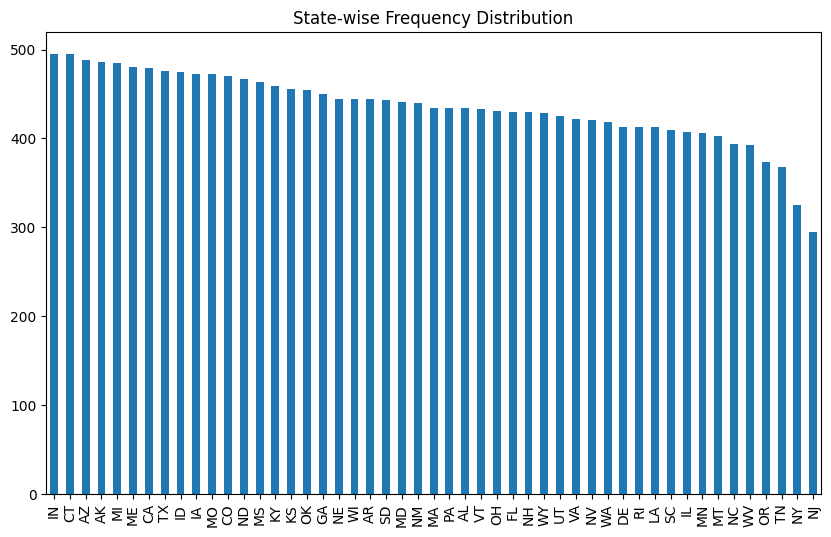

In [ ]:
plt.title("State-wise Frequency Distribution")
df_new['state'].value_counts().plot.bar(figsize=(10, 6))
plt.show()

* AL: Alabama
* AK: Alaska
* AZ: Arizona
* AR: Arkansas
* OK: Oklahoma
* MO: Missouri
* CA: California
* CO: Colorado
* CT: Connecticut
* DE: Delaware
* FL: Florida
* GA: Georgia
* ID: Idaho
* MT: Montana
* IL: Illinois
* IN: Indiana
* IA: Iowa
* KS: Kansas
* KY: Kentucky
* LA: Louisiana
* ME: Maine
* MD: Maryland
* MA: Massachusetts
* MI: Michigan
* MN: Minnesota
* MS: Mississippi
* NE: Nebraska
* NV: Nevada
* NH: New Hampshire
* NJ: New Jersey
* NM: New Mexico
* NY: New York
* NC: North Carolina
* ND: North Dakota
* OH: Ohio
* OR: Oregon
* PA: Pennsylvania
* RI: Rhode Island
* SC: South Carolina
* SD: South Dakota
* TN: Tennessee
* TX: Texas
* UT: Utah
* VT: Vermont
* VA: Virginia
* WA: Washington
* WV: West Virginia
* WI: Wisconsin
* WY: Wyoming

**Nhận xét:**
* Các tiểu bang có phân bố bất động sản tương đối đều nhau
* Tập trung nhiều nhất ở Connecticut và Indiana
* Tập trung ít nhất ở New Jersey

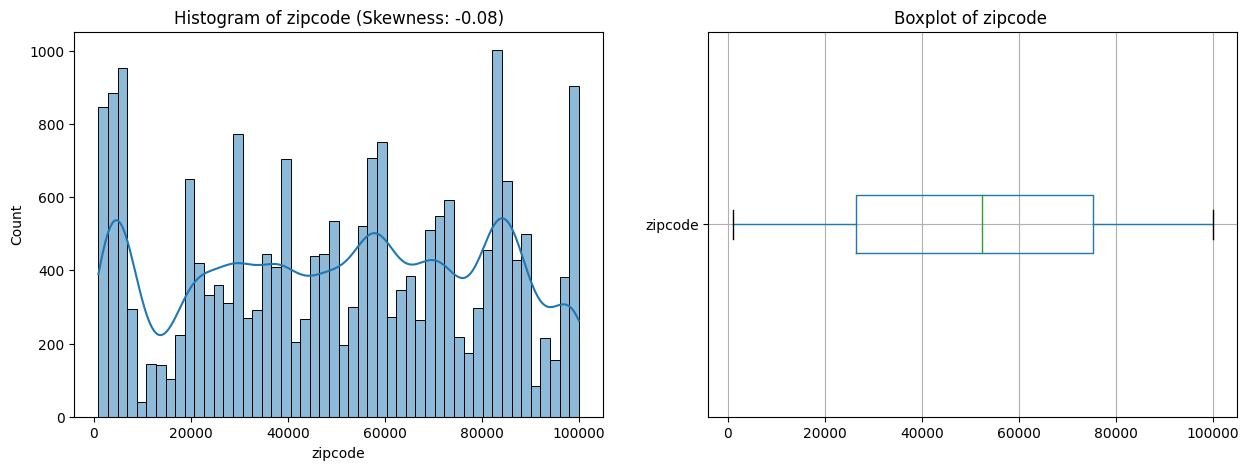

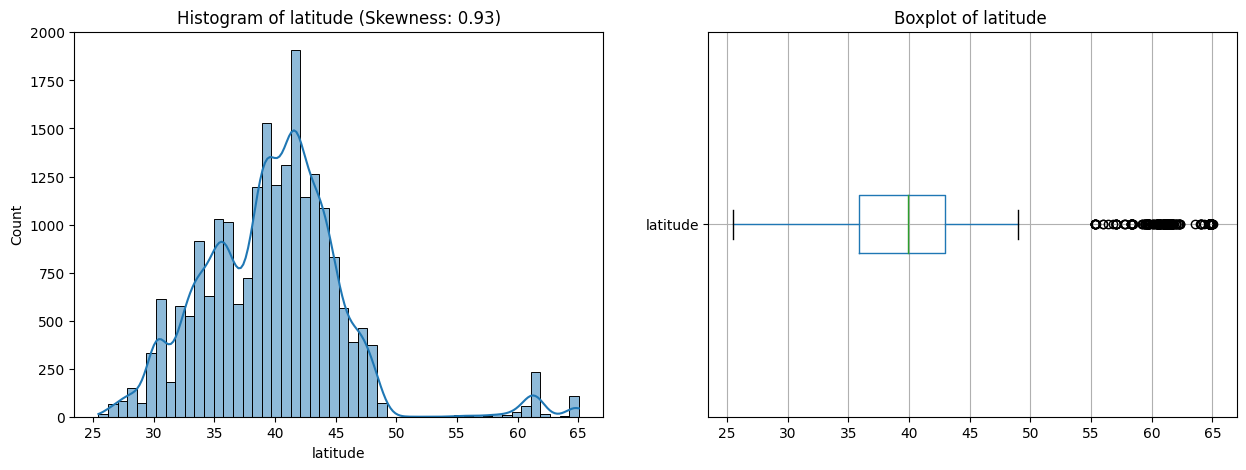

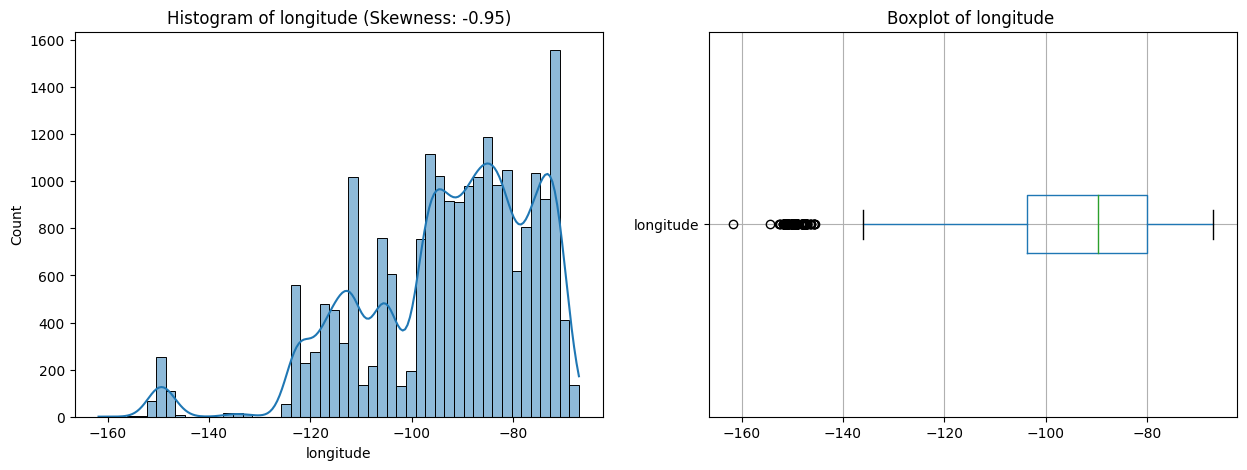

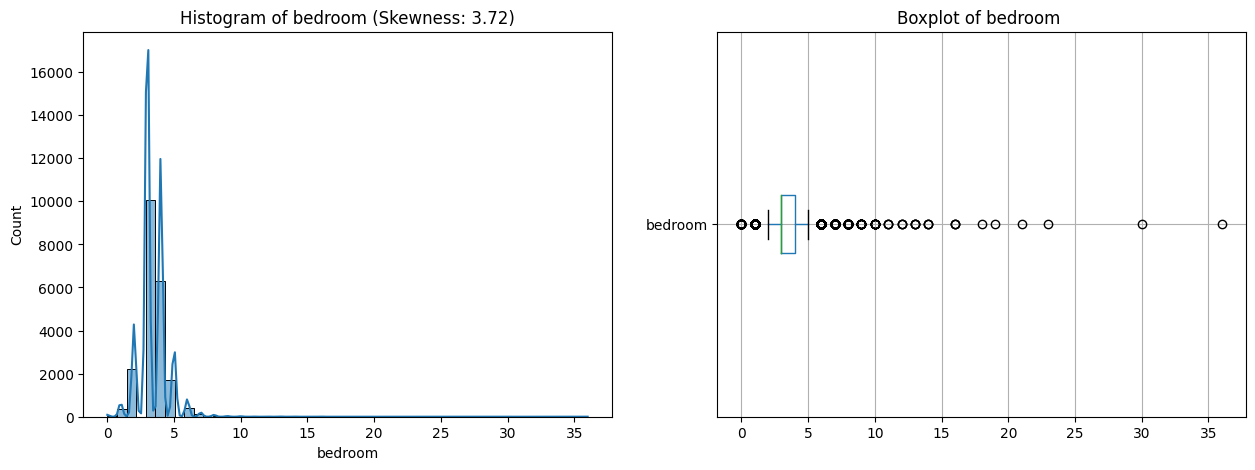

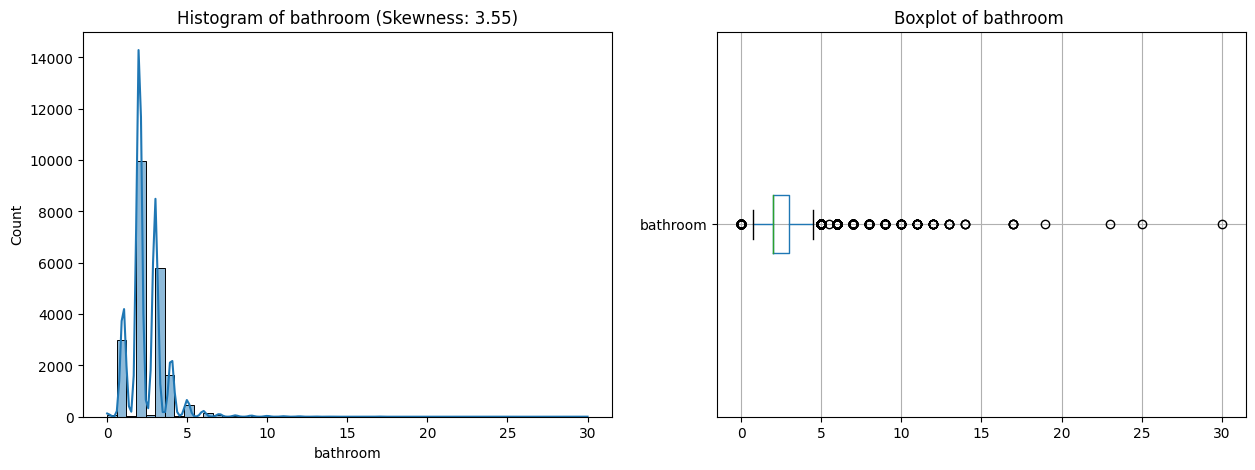

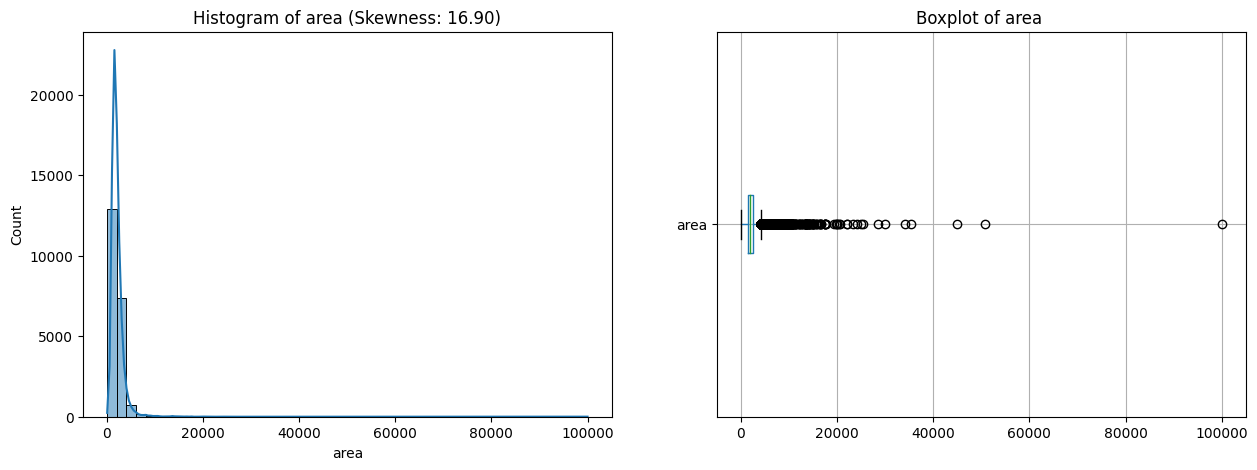

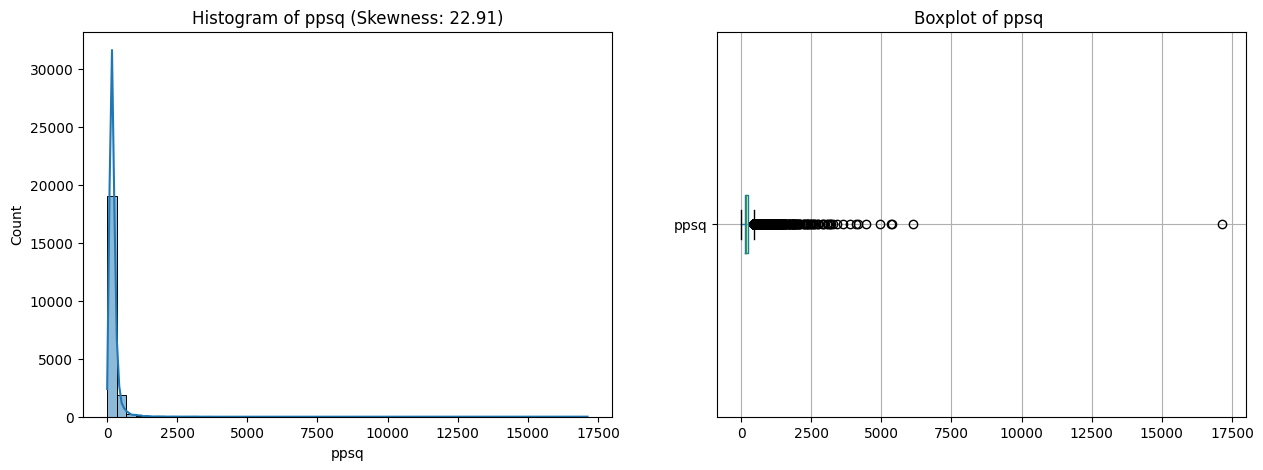

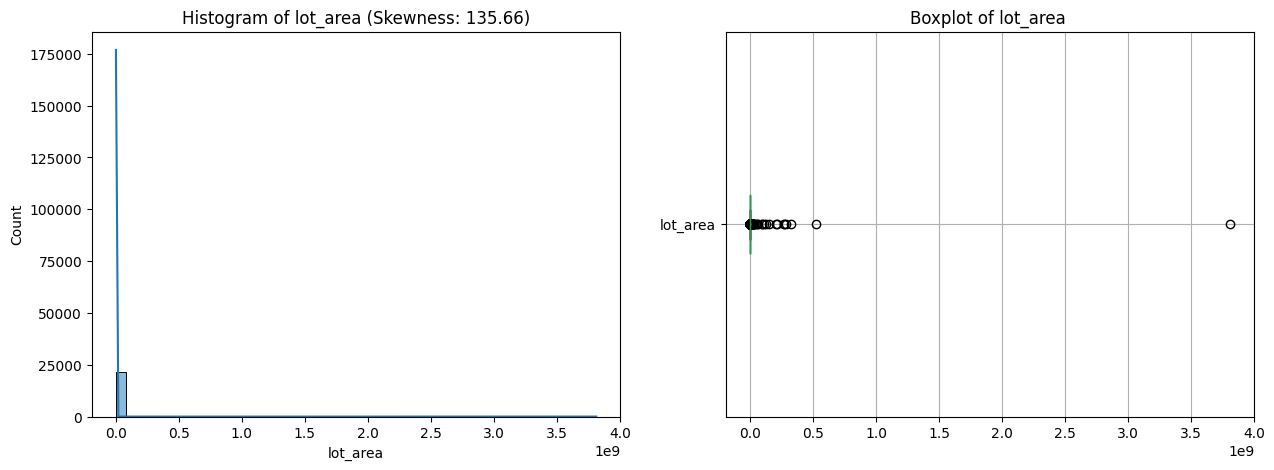

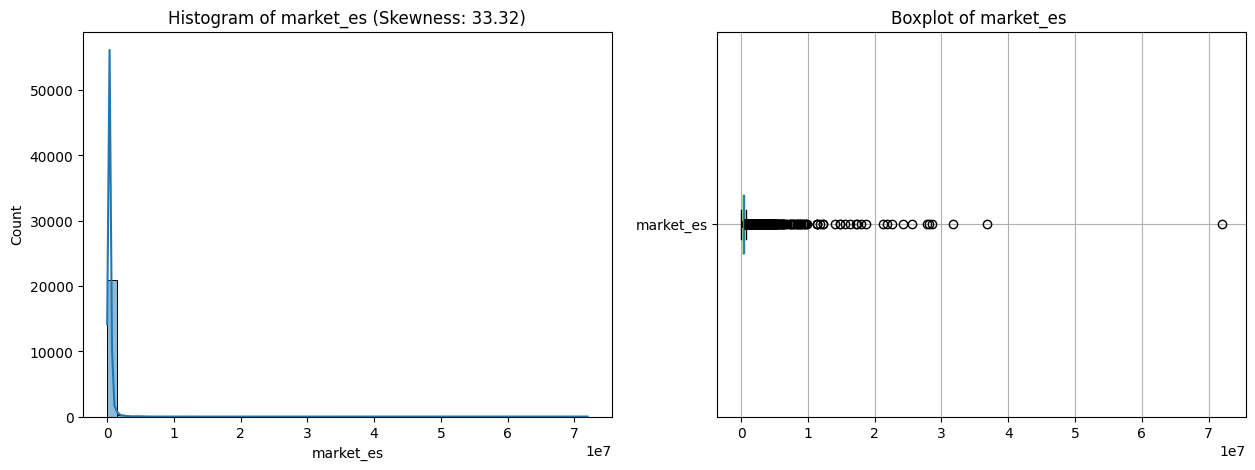

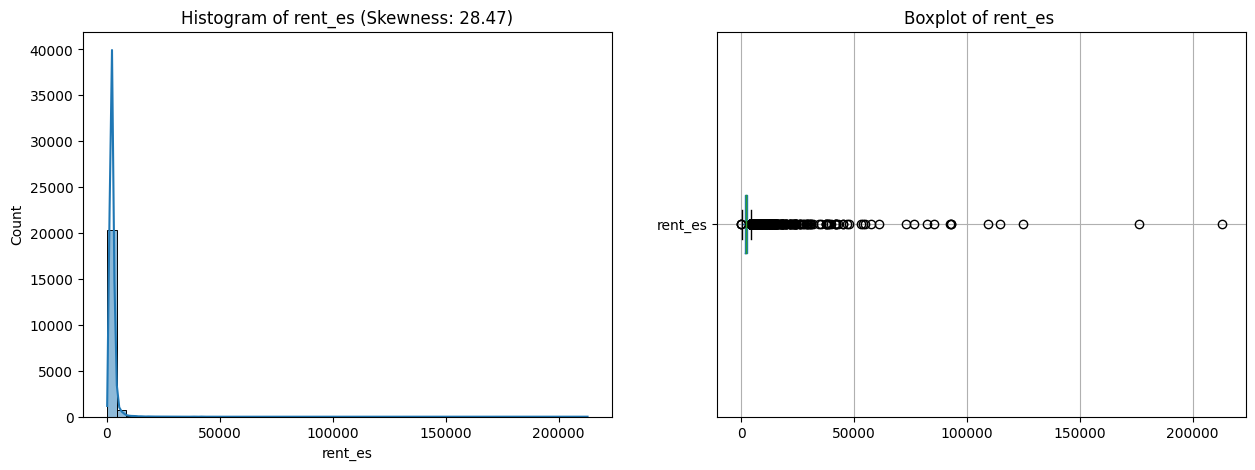

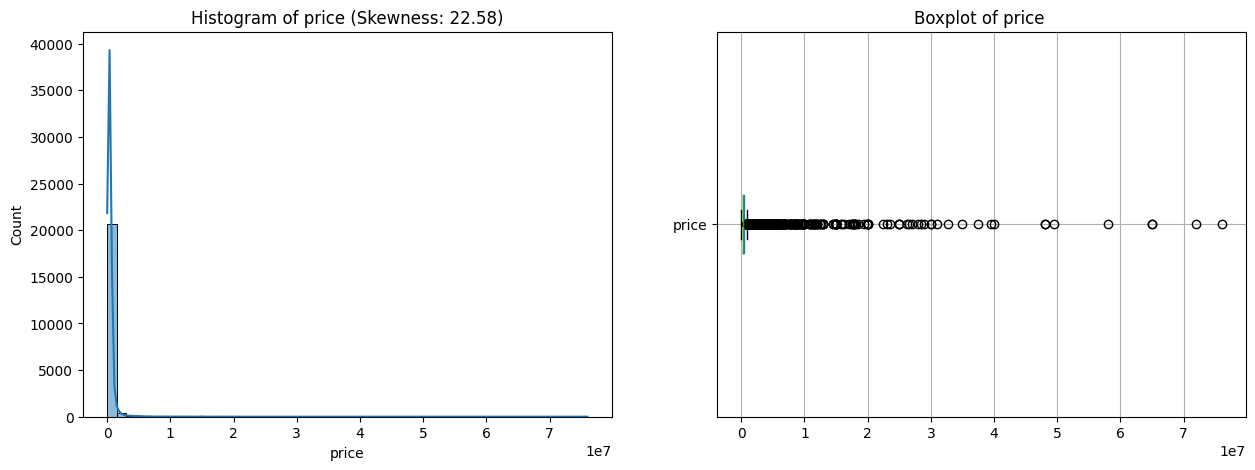

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
# Lặp qua các cột số trong DataFrame
for i in df_new.select_dtypes('number').columns:
    # Tính toán độ lệch (skewness)
    skewness = skew(df_new[i])
    # Tạo subplot
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    # Vẽ histogram và boxplot
    sns.histplot(x=df_new[i],bins=50, kde=True, ax=axes[0])
    df_new[[i]].boxplot(ax=axes[1], vert=False)
    # Thêm tiêu đề có chú thích về skewness
    axes[0].set_title(f'Histogram of {i} (Skewness: {skewness:.2f})')
    axes[1].set_title(f'Boxplot of {i} ')
    # Hiển thị biểu đồ
    plt.show()

**Nhận xét:**
* Số lượng phòng ngủ phổ biến ở khoảng từ 3 đến 4, chủ yếu nhất là 3 phòng. Xuất hiện giá trị ngoại biên. Phân bố dữ liệu có sự lệch hướng về bên phải.

* Số lượng phòng tắm giao động nhiều ở khoảng 1 đến 3, chủ yếu nhất là 2 phòng. Xuất hiện giá trị ngoại biên. Phân bố dữ liệu có sự lệch theo hướng về bên phải.

* Tổng diện tích của các ngôi nhà giao động từ 2000 feet đến 4000 feet và trung bình diện tích của một căn nhà là khoảng 2159 feet. Xuất hiện giá trị ngoại biên, nhỏ nhất là 1 feet và lớn nhất lên đến 99990 feet.

* Giá trung bình trên mỗi feet vuông rơi vào khoảng 268 đô la. Có những nơi đắt đến 550000 đô la 1 feet. Và có những nơi chỉ chưa đến 1 đô la. Phân bố tập trung vào khoảng 100 cho đến 10000 đô cho mỗi feet tùy vào vị trí địa lý và các yếu tố khác.

* Giá cho thuê ước tính của các căn nhà trung bình khoảng 2515 đô la và có xuất hiện các giá trị ngoại biên. Giá cho thuê tập trung nhiều ở mức từ 100 cho đến 5000 đô.

* Giá ước tính trên thị trường trung bình khoảng 445000 đô và có biến động lớn từ 157000 đô đến 71960000 đô. Điều này cho ta thấy giá các bất động sản là vô cùng đa dạng, có thể sẽ xuất hiện giá trị ngoại biên.

* Giá niêm yết trung bình của các căn nhà khoảng 553000 đô và có có biến động lớn tương tự như giá thị trường. Và khi so sánh giá trung bình của 2 đặc trưng, ta thấy được giá niêm yết thường có xu hướng cao hơn giá thị trường.

<h3>Thực hiện loại bỏ bớt các giá trị ngoại biên</h3>

In [ ]:
df_new = df_new[(df_new.area < 20000) & (df_new.bedroom < 25) & (df_new.bathroom <= 15) & (df_new.ppsq < 3000) & (df_new.lot_area < 50000000)
          & (df_new.rent_es < 30000) & (df_new.market_es <= 10000000)]

In [ ]:
q1=df_new['price'].quantile(0.25)
q3=df_new['price'].quantile(0.75)
iqr=q3-q1

In [ ]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [ ]:
clipped=df_new['price'].clip(lower,upper)
df_non_out=df_new[df_new['price'] == clipped]

In [ ]:
df_non_out.shape

(19841, 12)

In [ ]:
df_non_out.describe()

zipcode      latitude     longitude       bedroom      bathroom  \
count  19841.000000  19841.000000  19841.000000  19841.000000  19841.000000   
mean   50197.169649     39.770853    -92.228996      3.343229      2.287521   
std    29018.497721      5.755207     16.617348      0.952888      0.879433   
min     1002.000000     25.449816   -161.772780      0.000000      0.000000   
25%    26554.000000     35.912510   -101.017010      3.000000      2.000000   
50%    50501.000000     39.895996    -89.203636      3.000000      2.000000   
75%    73521.000000     42.923890    -80.074066      4.000000      3.000000   
max    99950.000000     65.044370    -67.016030     19.000000     11.000000   

               area          ppsq      lot_area     market_es       rent_es  \
count  19841.000000  19841.000000  1.984100e+04  1.984100e+04  19841.000000   
mean    1964.835391    194.427769  7.496411e+04  3.517323e+05   2186.136435   
std      839.757849    103.859766  3.187009e+05  1.626334e+05    797.287840   
min      100.000000      5.333333  1.176120e+03  1.570000e+04    100.000000   
25%     1399.000000    129.774306  7.840800e+03  2.301000e+05   1650.000000   
50%     1820.000000    177.248677  1.276300e+04  3.203000e+05   2063.000000   
75%     2368.000000    240.853659  3.920400e+04  4.396500e+05   2600.000000   
max    16592.000000   2500.000000  1.506653e+07  1.601100e+06  19726.000000   

               price  
count   19841.000000  
mean   358635.865985  
std    184695.279633  
min     12500.000000  
25%    224900.000000  
50%    329900.000000  
75%    465000.000000  
max    900000.000000

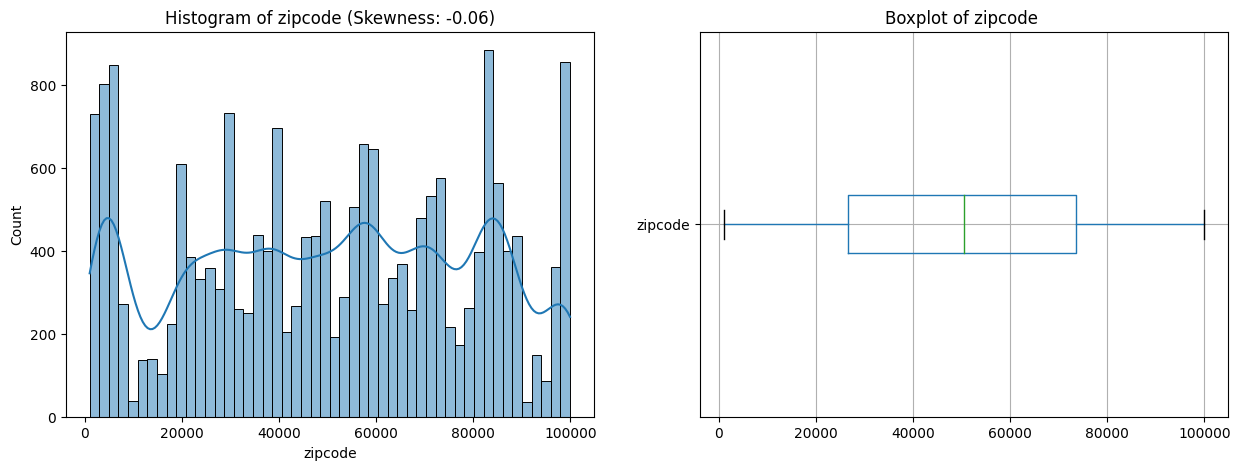

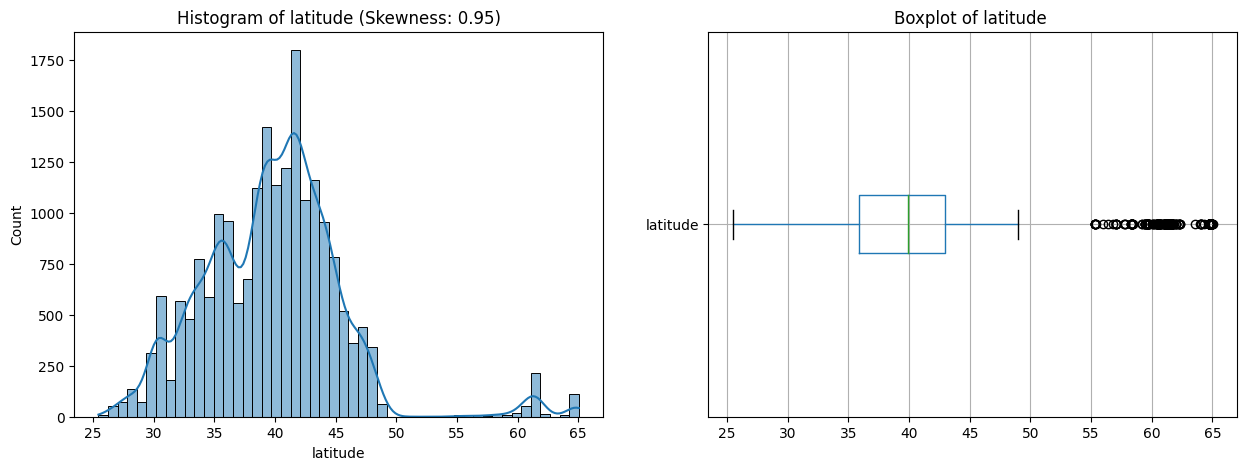

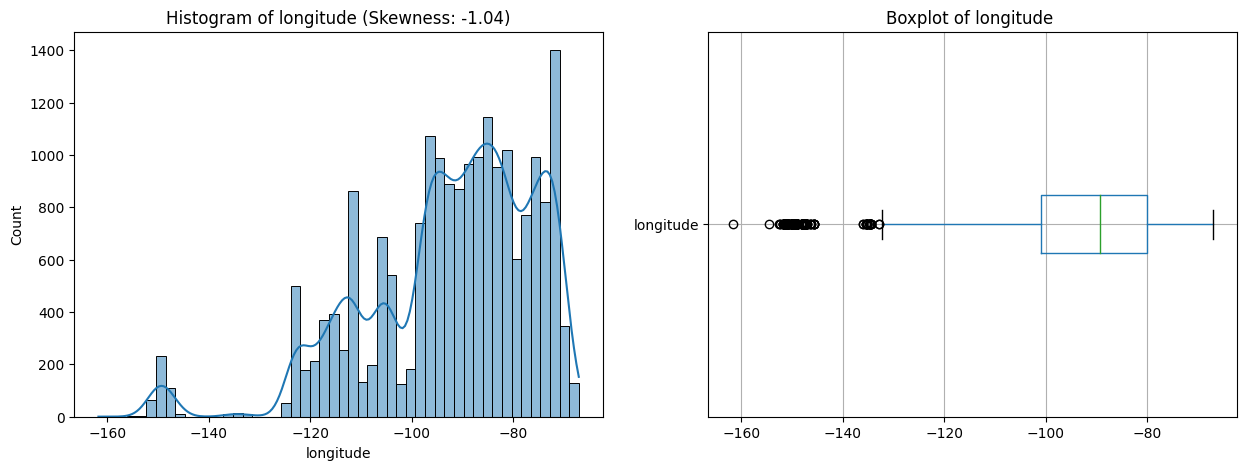

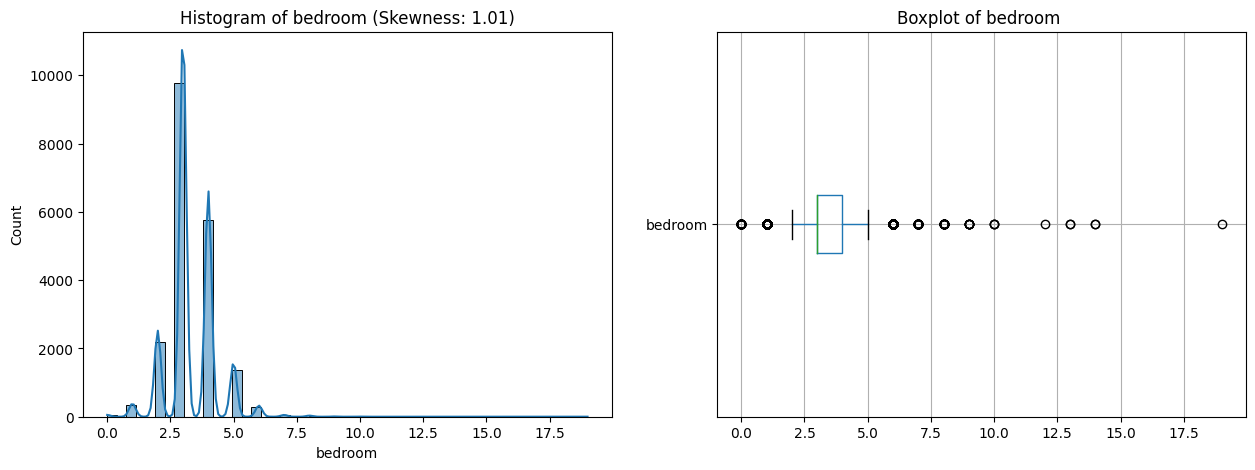

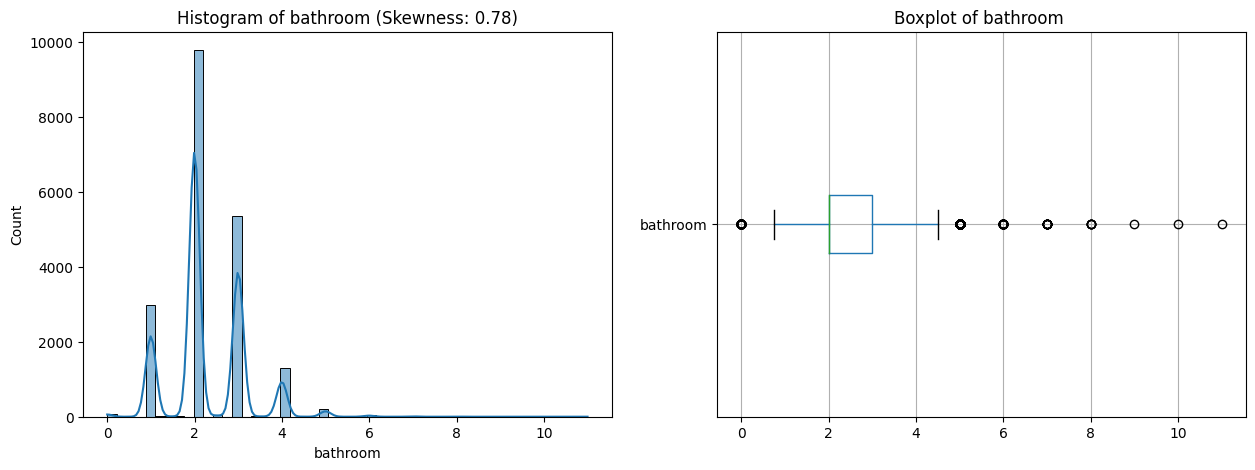

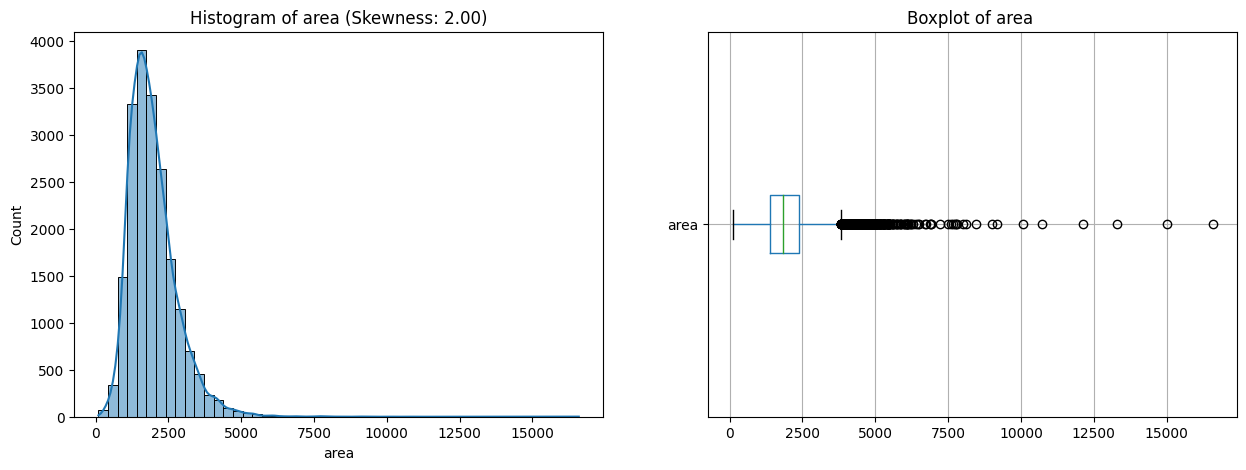

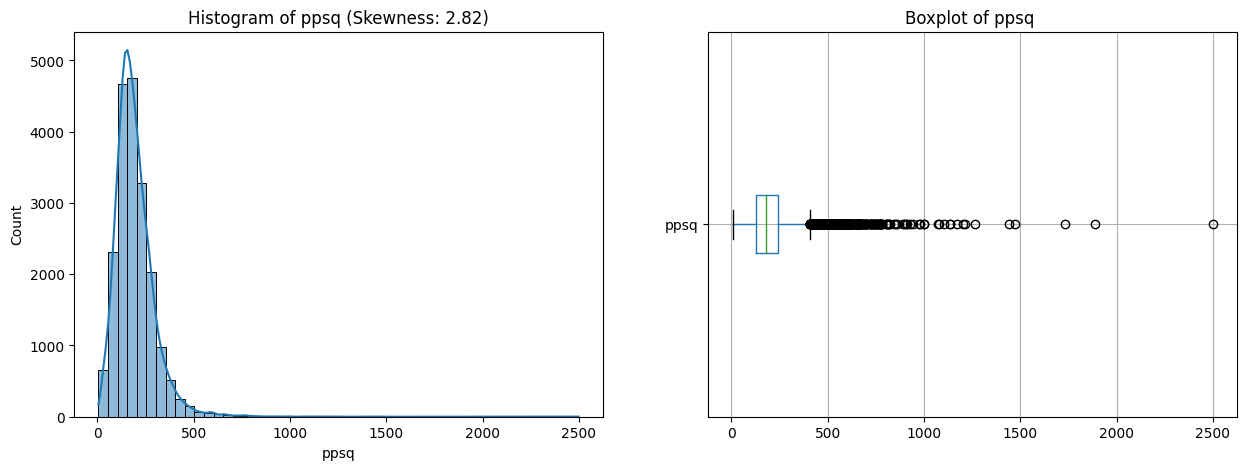

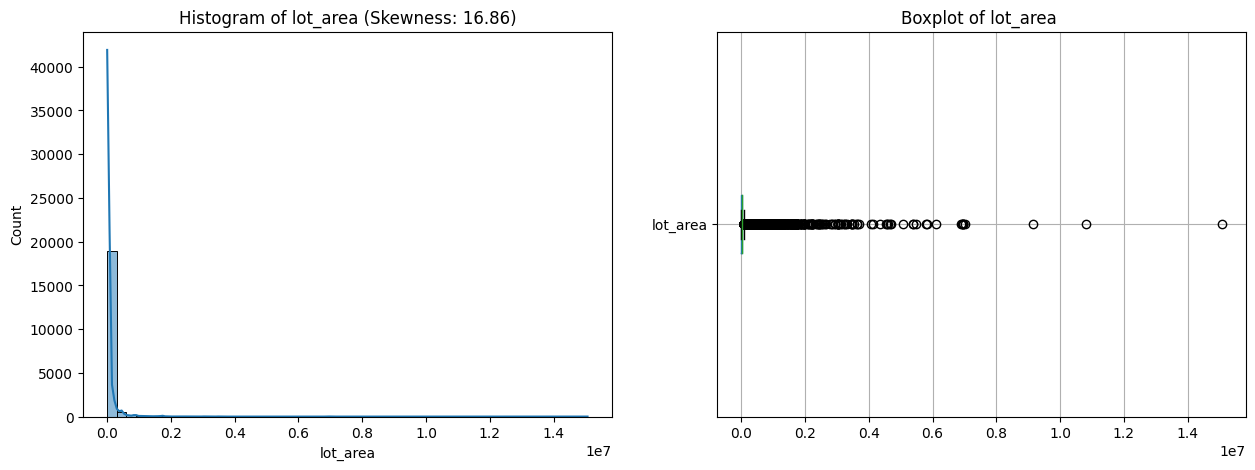

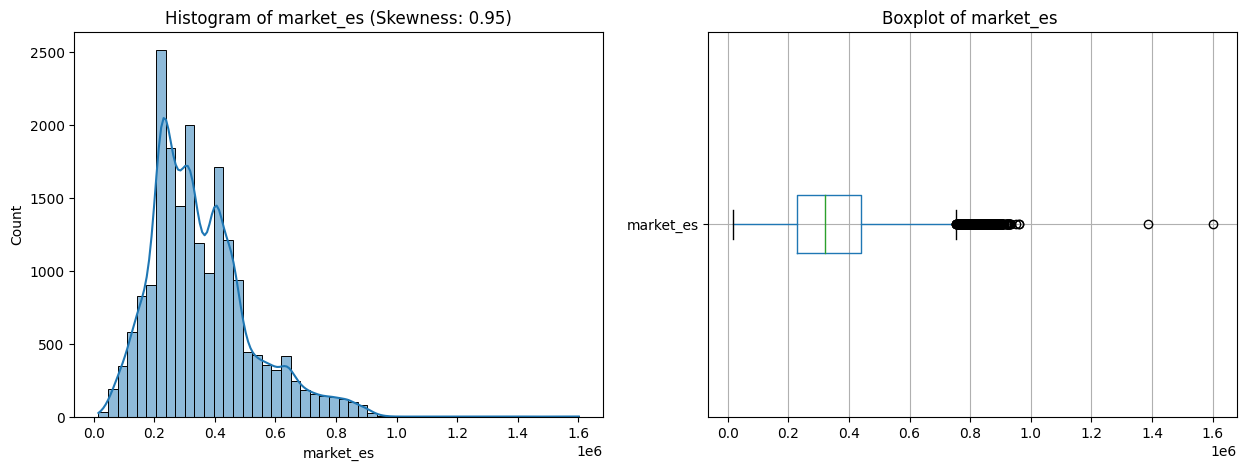

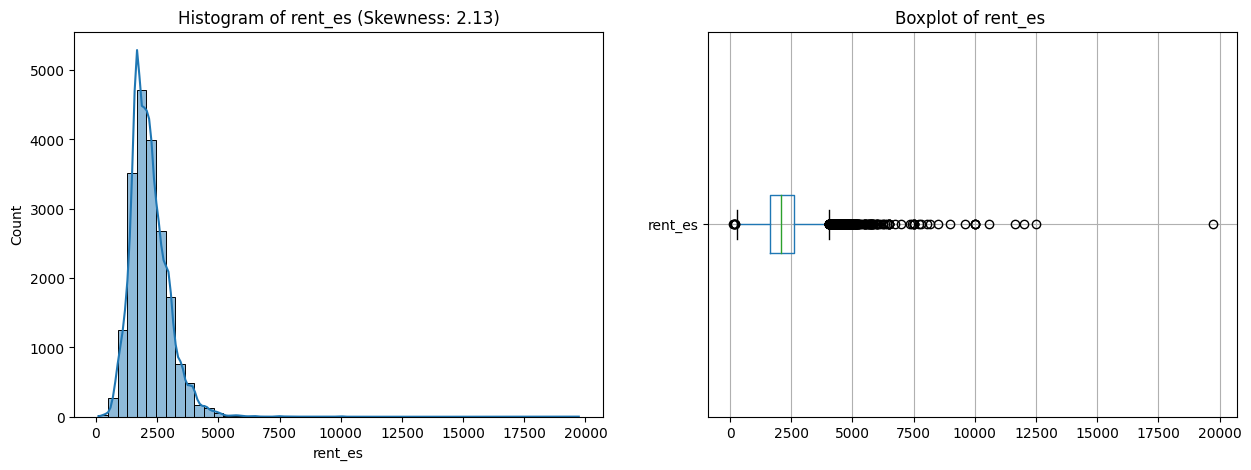

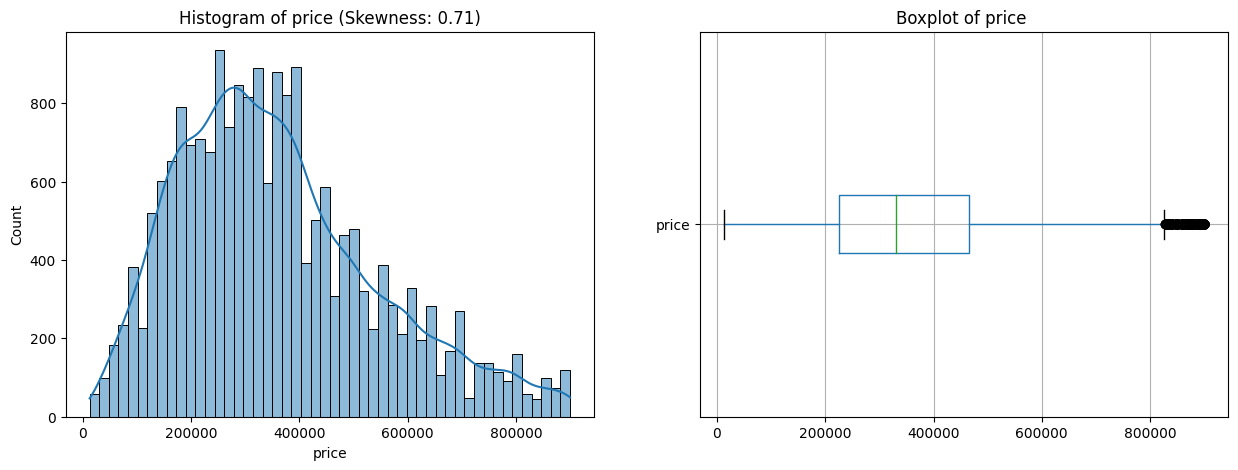

In [ ]:
for i in df_non_out.select_dtypes('number').columns:
    skewness = skew(df_non_out[i])
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    sns.histplot(x=df_non_out[i],bins=50, kde=True, ax=axes[0])
    df_non_out[[i]].boxplot(ax=axes[1], vert=False)
    axes[0].set_title(f'Histogram of {i} (Skewness: {skewness:.2f})')
    axes[1].set_title(f'Boxplot of {i} ')
    plt.show()

**Nhận xét sau khi loại giá trị ngoại biên:**
* Số phòng ngủ và số phòng tắm có sự phân bố đều hơn, số phòng trung bình cũng có chút thay đổi.
* Tổng diện tích các bất động sản đã có sự phân bố đều hơn, tuy nhiên vẫn còn hơi lệch về bên phải và các giá trị ngoại biên quá lớn đã không còn nên diện tích trung bình cũng thấp xuống.
* Giá trung bình trên mỗi feet cũng đã giảm xuống đáng kể, chỉ còn khoảng 194 đô trên một feet. Phân bố dữ liệu cũng đã cân bằng hơn so với trước khi loại giá trị ngoại biên.
* Giá ước tính trên thị trường đã có sự phân bố đều hơn. Giá trị trung bình chỉ còn khoảng 351000 đô và ta đã thấy được rõ hơn giá trung bình trên thị trường ước tính chủ yếu giao động từ 200000 đô cho đến 450000. Giá trị ngoại biên vẫn xuất hiện nhưng kh còn đáng kể.
* Giá niêm yết sau khi được xử lý bằng phương pháp iqr có giá trung bình gần bằng với giá thị trường tuy nhiên giá cao nhất vẫn thấp hơn. Và sự phân bố dữ liệu đã có phần đều hơn, giá giao động chủ yếu ở mức 200000 đến 400000 đô.

**Bivariate**

In [ ]:
df_clean = df_non_out

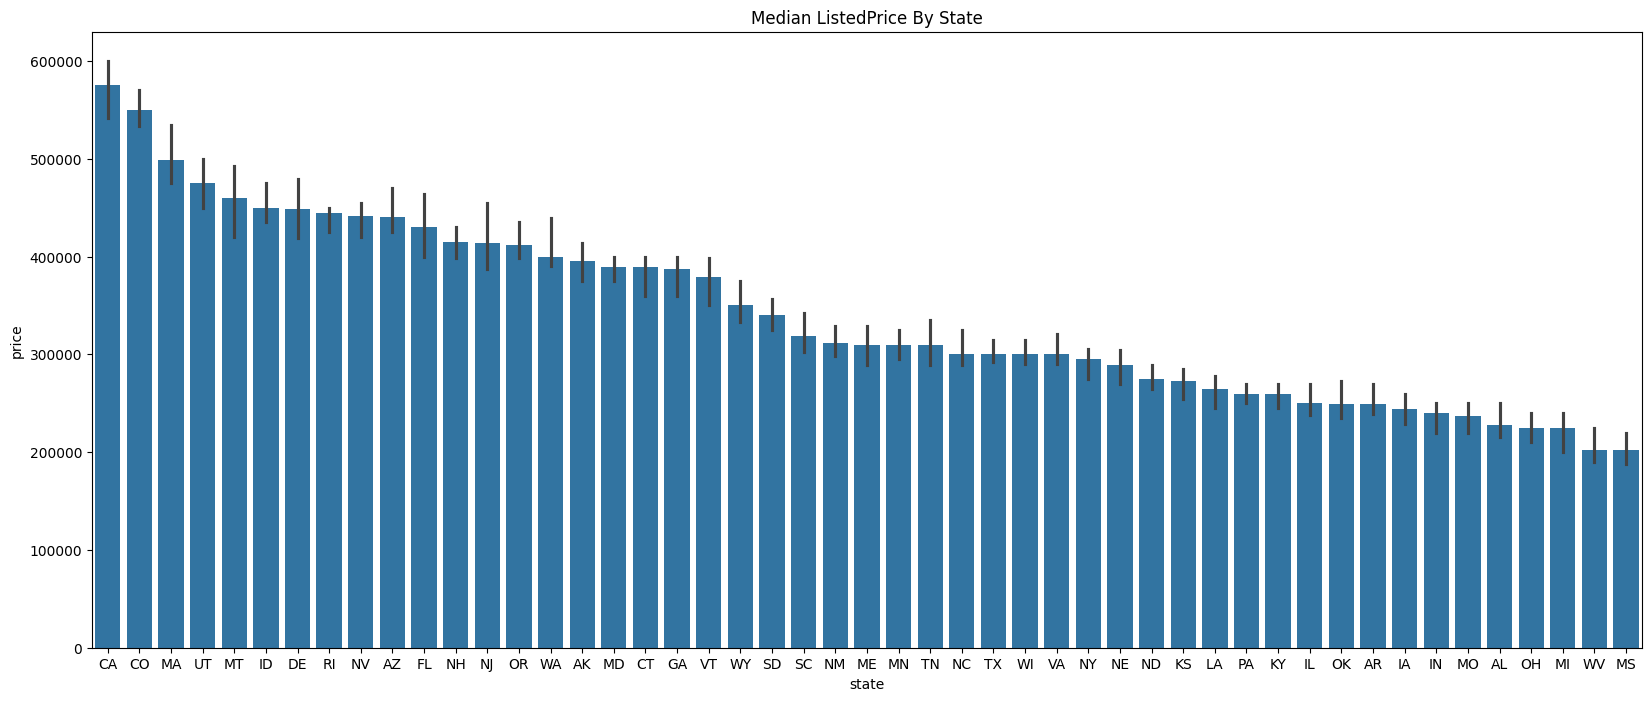

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Median ListedPrice By State")
sns.barplot(x=df_clean['state'], y=df_clean['price'], estimator=np.median, order=df_clean.groupby('state')['price'].median().sort_values(ascending=False).index)
plt.show()

**Nhận xét:**
* Tiểu bang có giá bất động sản trung bình cao nhất là California. Vì đây là một thành phố lớn, dân cư đông, mạnh về du lịch và hạn chế về diện tích đất nên giá trung bình sẽ cao hơn các tiểu bang khác.
* Tiểu bang có giá bất động sản trung bình thấp nhất là Mississippi. Vì ở đây người dân có mức thu thập trung bình thấp hơn các tiểu bang khác, dân số thấp, các cơ sở hạ tầng và tiện ích công cộng chưa được đầu tư do đó giá cả sẽ ít cạnh tranh hơn.

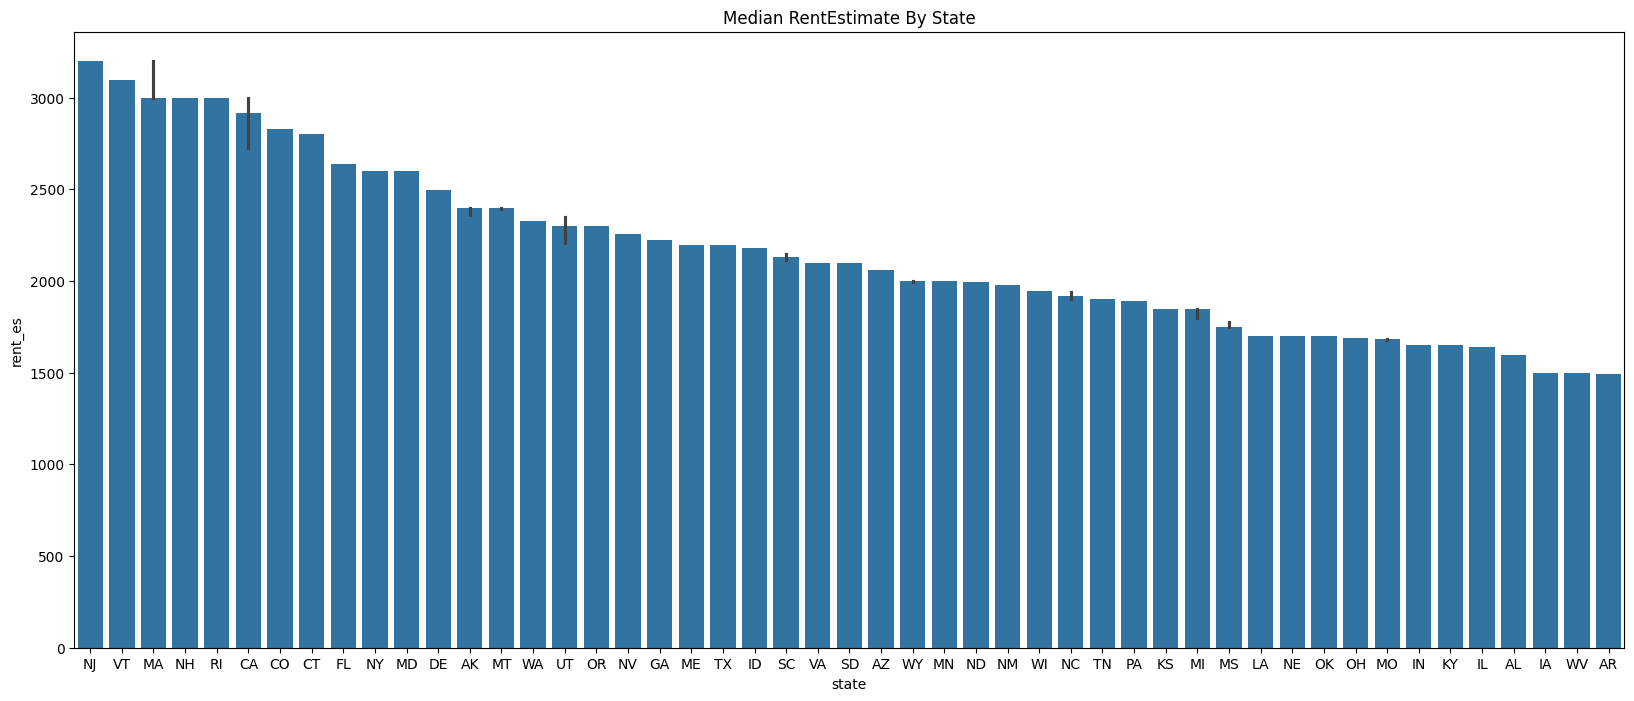

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Median RentEstimate By State")
sns.barplot(x=df_clean['state'], y=df_clean['rent_es'], estimator=np.median, order=df_clean.groupby('state')['rent_es'].median().sort_values(ascending=False).index)
plt.show()

**Nhận xét:**
* Giá thuê trung bình ước tính ở tiểu bang New Jersey là cao nhất. Vì đây là một tiểu bang gần với các thành phố lớn như New York, đông dân, người dân có thu thập trung bình cao do đó giá thuê cũng sẽ cạnh tranh hơn.
* Giá thuê trung bình ước tính thấp nhất là ở tiểu bang Arkansas. Vì ở đây thị trường nhà ở ít biến động nên giá thuê sẽ ít cạnh tranh, chưa có sự thu hút người dân di cư đến đây sinh sống dẫn đến việc khan hiếm dân số, vị trí địa lý thuộc vùng có nhiều núi và cây rừng dẫn đến việc thị trường lao động chưa được mạnh.

In [ ]:
num_col=list(df_clean.select_dtypes('number').columns)
num_col.remove('price')

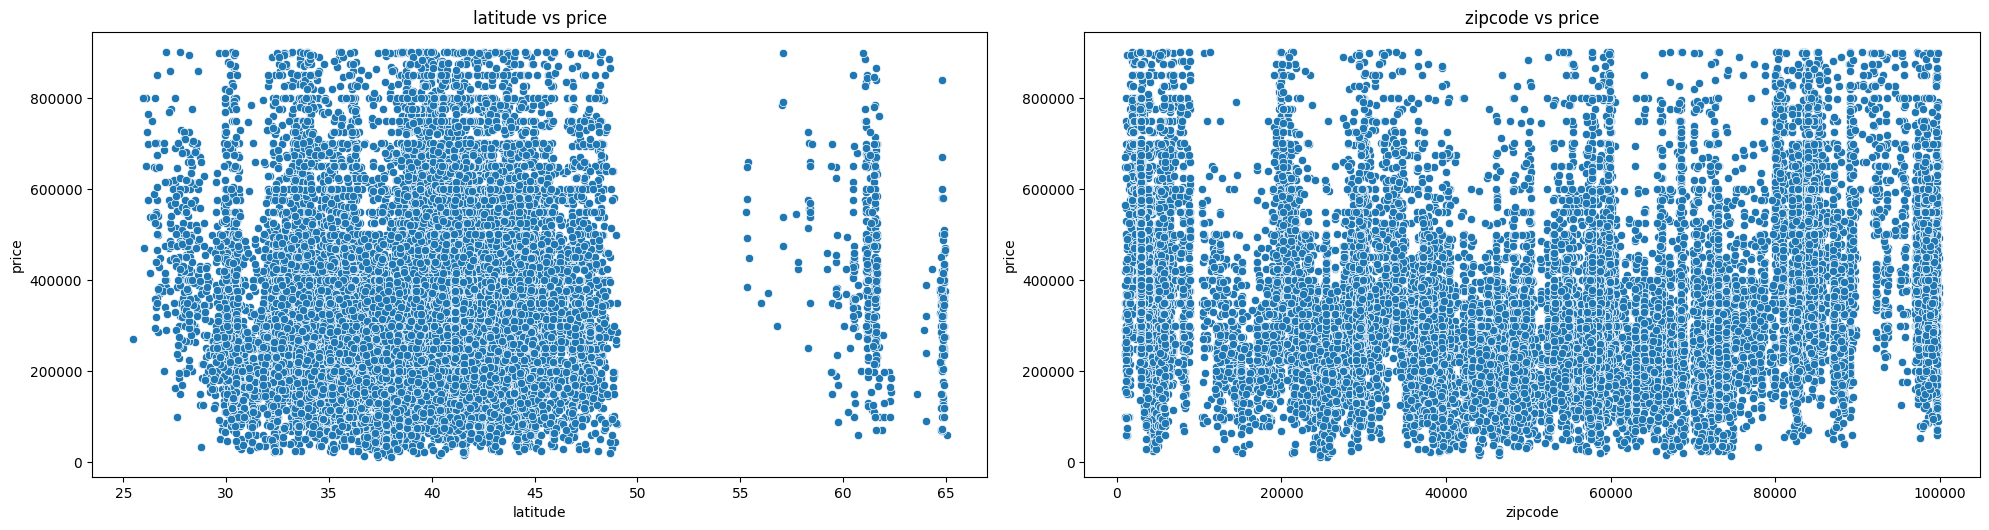

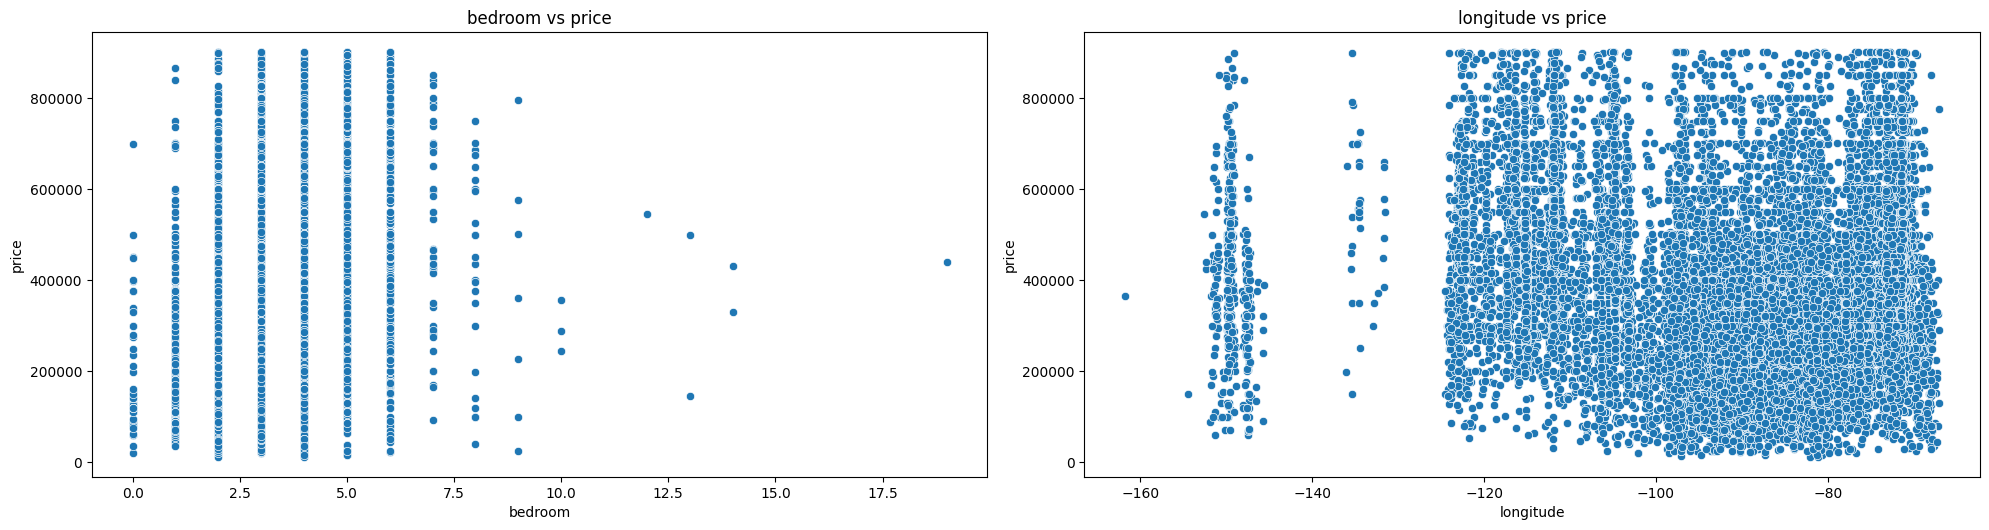

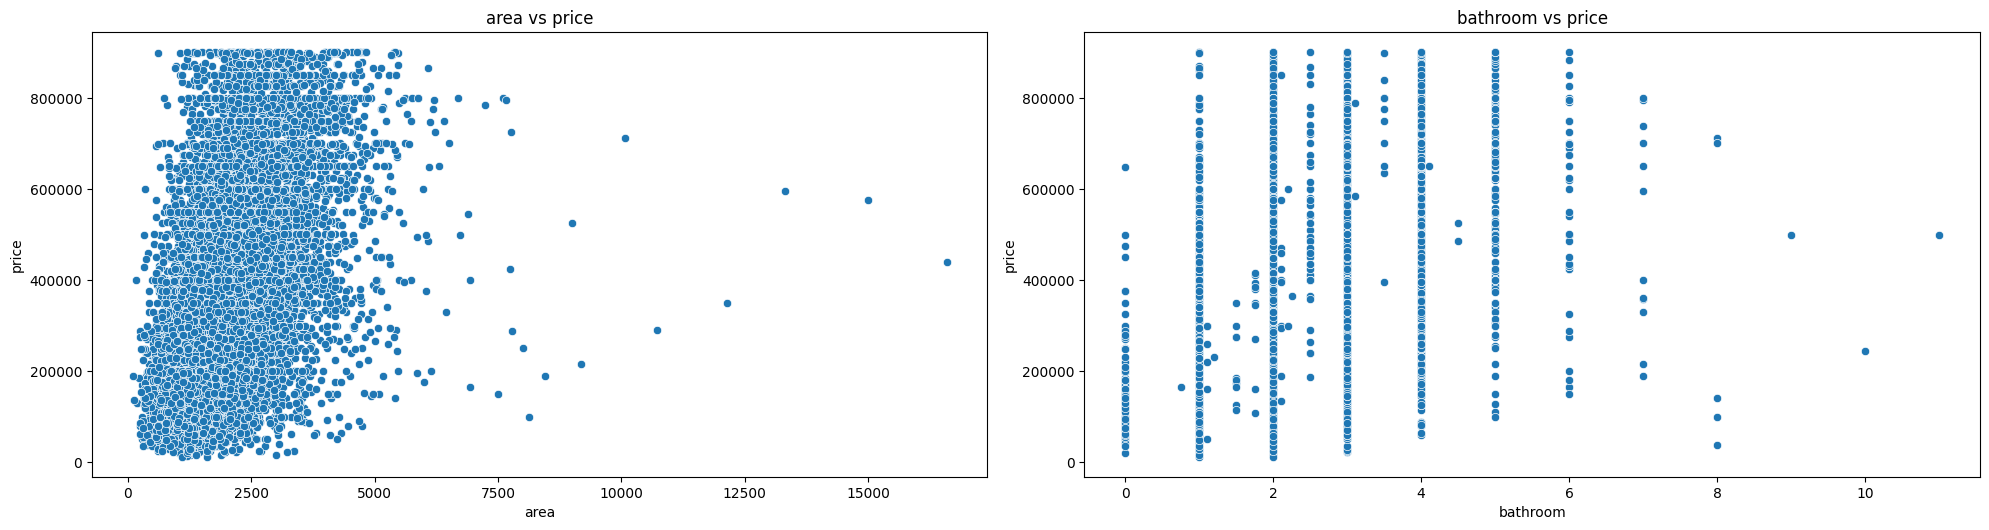

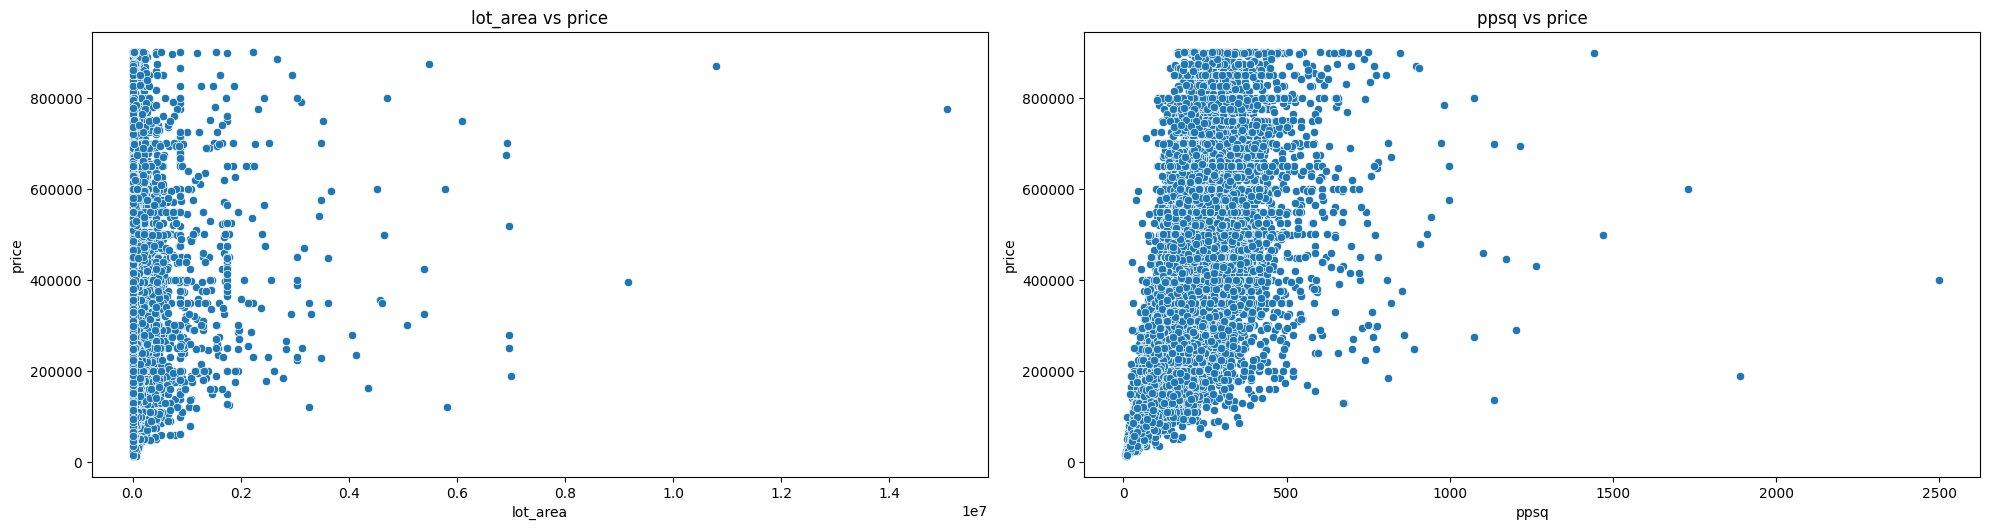

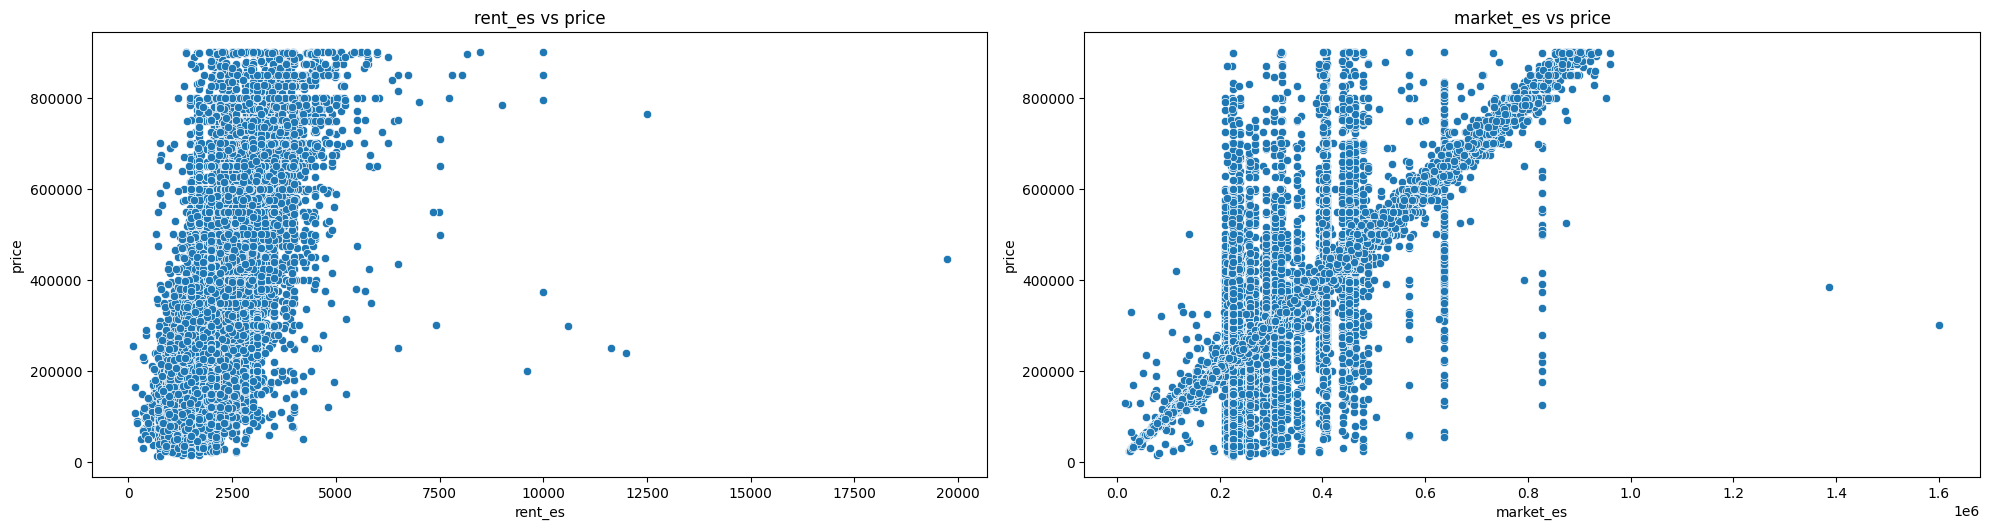

In [ ]:
i = 1
for j in num_col:
    if i % 2 == 1:
        plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, i % 2 + 1)
    sns.scatterplot(x=df_clean[j], y=df_clean['price'])
    plt.title(f'{j} vs price')
    if i % 2 == 0 or i == len(num_col):  # Nếu đã vẽ 2 hình hoặc đã hết biến
        plt.tight_layout()
        plt.show()
    i += 1

**Nhận xét:**
* Số lượng phòng ngủ ít ảnh hưởng đến giá nhà vì sự phân bố giá là tương đối giống nhau đối với các bất động sản có từ 2 đến 5 phòng ngủ. Các căn có nhiều phòng ngủ thì giá cũng chỉ thuộc mức trung bình thấp.
* Số lượng phòng tắm không ảnh hưởng nhiều đến giá nhà. Quá nhiều phòng tắm thì giá cũng chỉ thuộc mức trung bình khá chứ không cao.
* Tổng diện tích bất động sản sẽ ít ảnh hưởng đến giá nhà. Các lô đất có diện tích quá lớn cũng không có quá cao.
* Giá mỗi feet vuông có ảnh hưởng đến giá nhà. Giá nhà sẽ có xu hướng tăng khi ở mức từ 50 đến 500 đô cho mỗi feet.
* Giá thuê ước tính cũng có ảnh hưởng đến giá nhà. Giá thuê giao động từ 500 đến 5000 càng tăng thì giá nhà cũng có xu hướng tăng nhẹ.
* Giá ước tính trên thị trường có tương quan mạnh với giá nhà. Giá thị trường chênh lệnh đôi chút với giá nhà.

In [ ]:
df_cleaned = df_clean[(df_clean['bedroom'] <15) & (df_clean['area'] <=15000)  & (df_clean['ppsq'] <2000) & (df_clean['rent_es'] <15000) & (df_clean['market_es'] < 1200000) ]

In [ ]:
df_cleaned.shape

(19836, 12)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19836 entries, 0 to 24520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      19836 non-null  object 
 1   zipcode    19836 non-null  float64
 2   latitude   19836 non-null  float64
 3   longitude  19836 non-null  float64
 4   bedroom    19836 non-null  float64
 5   bathroom   19836 non-null  float64
 6   area       19836 non-null  float64
 7   ppsq       19836 non-null  float64
 8   lot_area   19836 non-null  float64
 9   market_es  19836 non-null  float64
 10  rent_es    19836 non-null  float64
 11  price      19836 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.0+ MB


**Multivariate**

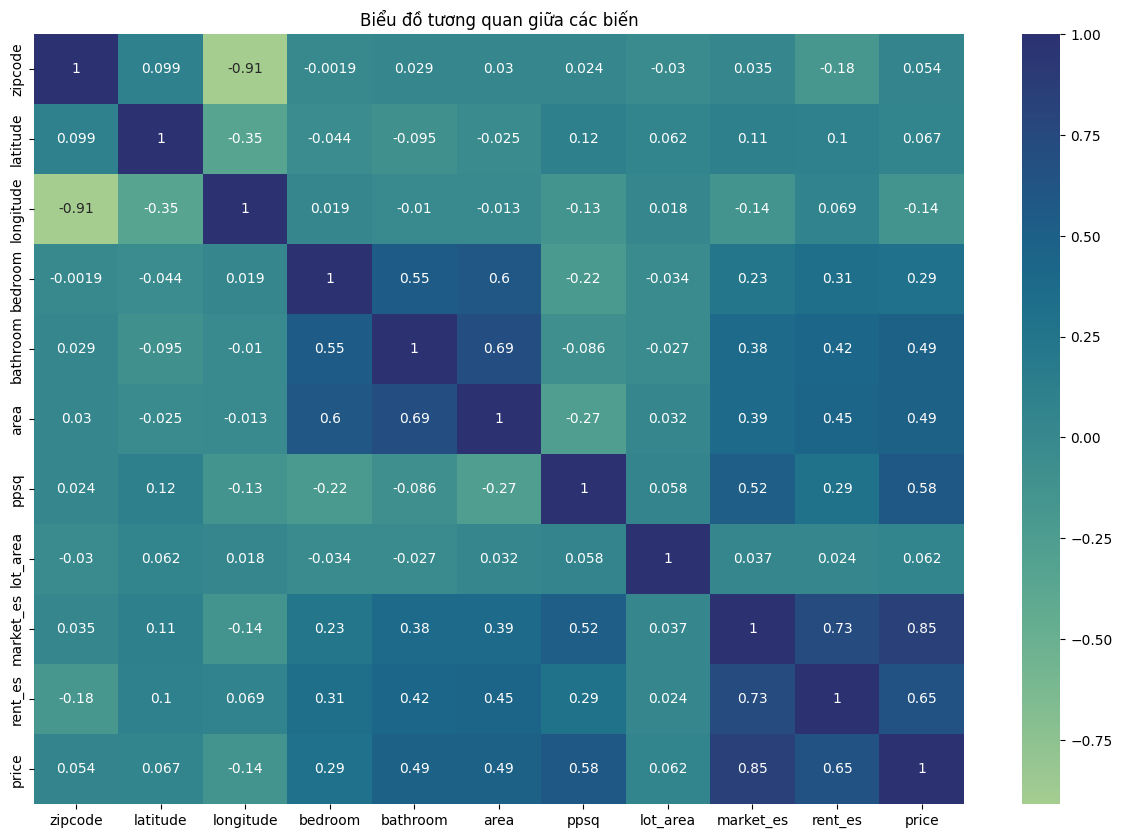

In [ ]:
corr = df_cleaned.select_dtypes('number').corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='crest')
plt.title('Biểu đồ tương quan giữa các biến')
plt.show()

**Nhận xét:**
* Giá thị trường gần như tương quan hoàn toàn với giá niêm yết.
* Giá thuê có tương quan tích cực mạnh với giá niêm yết.
* Các biến zipcode, latitude, longitude, lot_area có tương quan yếu với giá niêm yết.

***

# Data Preparation and Feature Engineering

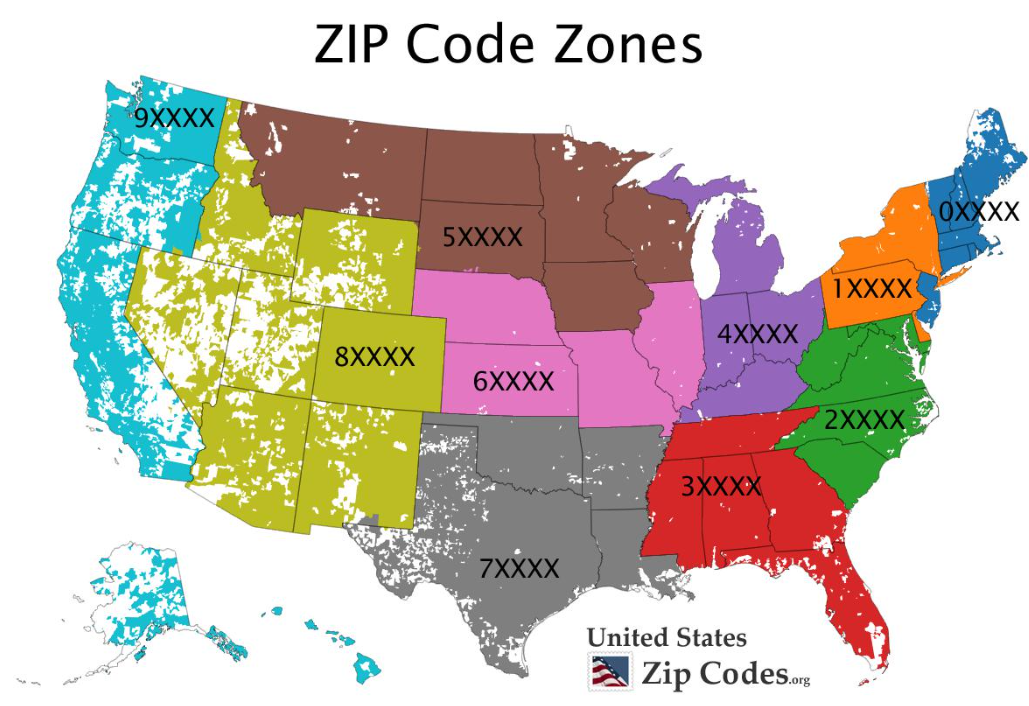

In [ ]:
df_train = df_cleaned.drop(columns=['longitude','latitude'])
df_train['zipcode'] = df_train['zipcode'].astype(int).astype(str)
df_train

state zipcode  bedroom  bathroom    area        ppsq    lot_area  \
0        AL   36571      4.0       2.0  1614.0  148.636927   16574.580   
2        AL   36567      3.0       2.0  1800.0  144.388889  139392.000   
4        AL   35043      3.0       3.0  2224.0  150.629496   11325.600   
6        AL   36117      3.0       2.0  1564.0   96.547315    8712.000   
7        AL   35957      3.0       2.0  1717.0  139.196273   16552.800   
...     ...     ...      ...       ...     ...         ...         ...   
24516    WY   82053      2.0       1.0  1112.0  337.230216  871200.000   
24517    WY   82414      2.0       3.0  1232.0  241.801948    1306.800   
24518    WY   82513      2.0       2.0  2016.0  262.896825   61855.200   
24519    WY   82009      3.0       2.0  2930.0  196.552901  271378.800   
24520    WY   82636      3.0       3.0  2300.0  143.434783    7575.084   

       market_es  rent_es     price  
0       240600.0   1599.0  239900.0  
2       223550.0   1599.0  259900.0  
4       336200.0   1932.0  335000.0  
6       150500.0   1385.0  151000.0  
7       238400.0   2125.0  239000.0  
...          ...      ...       ...  
24516   368600.0   1500.0  375000.0  
24517   350750.0   1999.0  297900.0  
24518   350750.0   2294.0  530000.0  
24519   558000.0   2749.0  575900.0  
24520   329500.0   1614.0  329900.0  

[19836 rows x 10 columns]

In [ ]:
df_copy = df_train

In [ ]:
df_train[df_train['zipcode'].str.len() == 4]['zipcode']

3002     6413
3003     6457
3004     6477
3005     6488
3006     6260
         ... 
22015    5759
22016    5201
22017    5701
22019    5855
22020    5819
Name: zipcode, Length: 2653, dtype: object

In [ ]:
df_train.loc[df_train.state == 'CT']

state zipcode  bedroom  bathroom    area        ppsq  lot_area  \
3002    CT    6413      3.0       2.0  1488.0  168.010753   28314.0   
3003    CT    6457      2.0       1.0   910.0  236.263736    6098.4   
3004    CT    6477      4.0       3.0  3098.0  203.034216   54450.0   
3005    CT    6488      3.0       3.0  1694.0  259.681228   78843.6   
3006    CT    6260      3.0       2.0  1272.0  132.861635    3920.4   
...    ...     ...      ...       ...     ...         ...       ...   
3497    CT    6010      3.0       2.0  1276.0  192.006270    7840.8   
3498    CT    6415      3.0       1.0  1066.0  468.949343  432115.2   
3499    CT    6883      3.0       2.0  1340.0  369.402985   87120.0   
3500    CT    6457      3.0       3.0  2000.0  224.500000    4791.6   
3501    CT    6401      3.0       2.0  1788.0  251.118568   10018.8   

      market_es  rent_es     price  
3002   404000.0   2800.0  250000.0  
3003   231500.0   1895.0  215000.0  
3004   445300.0   3499.0  629000.0  
3005   404000.0   2800.0  439900.0  
3006   404000.0   2800.0  169000.0  
...         ...      ...       ...  
3497   244900.0   2250.0  245000.0  
3498   497000.0   1849.0  499900.0  
3499   517100.0   3214.0  495000.0  
3500   404000.0   2800.0  449000.0  
3501   404000.0   2800.0  449000.0  

[440 rows x 10 columns]

In [ ]:
df_train['zipcode'] = df_train['zipcode'].apply(lambda x: x.zfill(5) if len(x) == 4 else x)

In [ ]:
df_train = df_train.copy()
df_train['NationalArea'] = df_train['zipcode'].str[0].astype(int)
df_train['CPO1'] = df_train['zipcode'].str[1].astype(int)
df_train['CPO2'] = df_train['zipcode'].str[2].astype(int)
df_train['APO1'] = df_train['zipcode'].str[3].astype(int)
df_train['APO2'] = df_train['zipcode'].str[4].astype(int)

**Loại bỏ cột Zipcode và tạo các cột mới  như:**
* NationalArea đại diện cho  tiểu bang hoặc khu vực
* CPO1 đại diện khu vực nằm trong tiểu bang
* CPO2, APO1 đại diện cho các vùng nhỏ hơn hơn trong thành phố hoặc khu vực đô thị.
* APO2 phân biệt các khu vực nhỏ nhất như là một phần của một thị trấn, khu phố, hoặc khu dân cư cụ thể.

Ví dụ :
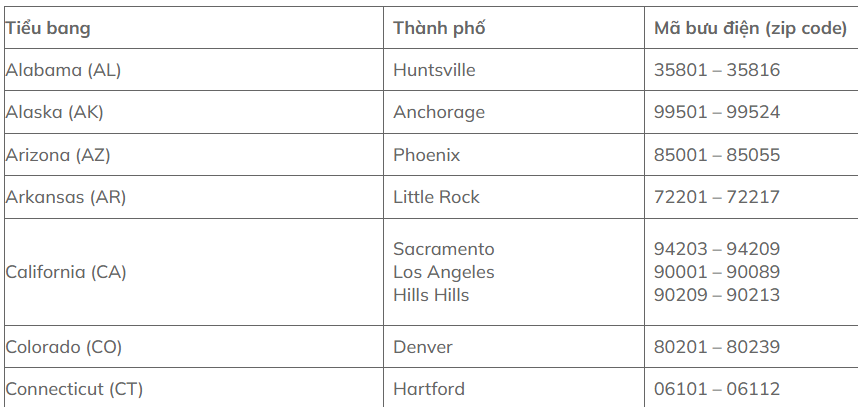


In [ ]:
df_train.drop('zipcode',axis=1,inplace=True)
df_train

state  bedroom  bathroom    area        ppsq    lot_area  market_es  \
0        AL      4.0       2.0  1614.0  148.636927   16574.580   240600.0   
2        AL      3.0       2.0  1800.0  144.388889  139392.000   223550.0   
4        AL      3.0       3.0  2224.0  150.629496   11325.600   336200.0   
6        AL      3.0       2.0  1564.0   96.547315    8712.000   150500.0   
7        AL      3.0       2.0  1717.0  139.196273   16552.800   238400.0   
...     ...      ...       ...     ...         ...         ...        ...   
24516    WY      2.0       1.0  1112.0  337.230216  871200.000   368600.0   
24517    WY      2.0       3.0  1232.0  241.801948    1306.800   350750.0   
24518    WY      2.0       2.0  2016.0  262.896825   61855.200   350750.0   
24519    WY      3.0       2.0  2930.0  196.552901  271378.800   558000.0   
24520    WY      3.0       3.0  2300.0  143.434783    7575.084   329500.0   

       rent_es     price  NationalArea  CPO1  CPO2  APO1  APO2  
0       1599.0  239900.0             3     6     5     7     1  
2       1599.0  259900.0             3     6     5     6     7  
4       1932.0  335000.0             3     5     0     4     3  
6       1385.0  151000.0             3     6     1     1     7  
7       2125.0  239000.0             3     5     9     5     7  
...        ...       ...           ...   ...   ...   ...   ...  
24516   1500.0  375000.0             8     2     0     5     3  
24517   1999.0  297900.0             8     2     4     1     4  
24518   2294.0  530000.0             8     2     5     1     3  
24519   2749.0  575900.0             8     2     0     0     9  
24520   1614.0  329900.0             8     2     6     3     6  

[19836 rows x 14 columns]

***

# Train Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [ ]:
X=df_train.drop(['price','state'],axis=1)
y= df_train['price']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=101)

In [ ]:
print(f"x_train shape: {X_train.shape}\nx_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

x_train shape: (15868, 12)
x_test shape: (3968, 12)
y_train shape: (15868,)
y_test shape: (3968,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model= RandomForestRegressor()
model.fit(X_train,y_train)
y_pred_rf= model.predict(X_test)

In [ ]:
mae = round(mean_absolute_error(y_test,y_pred_rf), 1)
r2 = round(r2_score(y_test,y_pred_rf), 3)
mape = round(mean_absolute_percentage_error(y_test,y_pred_rf)*100, 1)
print(f"Model Name: RamdomForest")
print(f"Mean Absoulute Error: {mae}")
print(f"R-Score: {r2}")
print(f"Mean Absoulute Percentage Error: {mape}%")


Model Name: RamdomForest
Mean Absoulute Error: 6918.8
R-Score: 0.99
Mean Absoulute Percentage Error: 2.4%


In [ ]:
model_li = LinearRegression()
model_li.fit(X_train,y_train)
y_pred_ln= model_li.predict(X_test)
mae = round(mean_absolute_error(y_test,y_pred_ln), 1)
r2 = round(r2_score(y_test,y_pred_ln), 3)
mape = round(mean_absolute_percentage_error(y_test,y_pred_ln)*100, 1)
print(f"Model Name: LinearRegression ")
print(f"Mean Absoulute Error: {mae}")
print(f"R-Score: {r2}")
print(f"Mean Absoulute Percentage Error: {mape}%")

Model Name: LinearRegression 
Mean Absoulute Error: 40293.4
R-Score: 0.873
Mean Absoulute Percentage Error: 17.9%


In [ ]:
model_xg = xgb.XGBRegressor()
model_xg.fit(X_train,y_train)
y_pred_xg= model_xg.predict(X_test)
mae = round(mean_absolute_error(y_test,y_pred_xg), 1)
r2 = round(r2_score(y_test,y_pred_xg), 3)
mape = round(mean_absolute_percentage_error(y_test,y_pred_xg)*100, 1)
print(f"Model Name: XGBRegressor ")
print(f"Mean Absoulute Error: {mae}")
print(f"R-Score: {r2}")
print(f"Mean Absoulute Percentage Error: {mape}%")

Model Name: XGBRegressor 
Mean Absoulute Error: 9149.0
R-Score: 0.992
Mean Absoulute Percentage Error: 3.2%


**Nhận xét:**
* Qua việc training 3 mô hình là LinearRegression, RandomForestRegressor và XGBRegressor ta có nhận thấy rằng:
* Mô hình RandomForestRegressor và XGBRegressor có độ chính xác bằng nhau và khá cao ở mức 99% . Mô hình LinearRegression có độ chính xác cũng ở mức ổn là 87%.
* Giữa 2 mô hình RandomForestRegressor và XGBRegressor ta có thể thấy độ lỗi của mô hình có sự chênh lệch với MAE lầ lượt là 6918 và 9149 . Độ lỗi của mô hình RandomForestRegressor là thấp hơn so với mô hình XGBRegressor.

⟹ Mô hình RandomForestRegressor là lựa chọn tối ưu nhất cho bài toán dự đoán giá nhà mà nhóm đã đặt ra.


